**Exploratory Data Analysis**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

import time
import warnings
warnings.filterwarnings("ignore")

2024-02-13 14:17:07.156222: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-13 14:17:07.156324: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-13 14:17:07.158628: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**The Total Charges column has a data type of object, but upon inspecting its values, it is supposed to be float64**

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

**Features with missing values**

In [7]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

All columns/features seem to have no missing values except for Total Charges, which need to be inspected.

In [8]:
df[np.isnan(df["TotalCharges"])]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

It seems that there are problems with these observations because even though the Total Charges of these customers are blank, they have Monthly Charges. Further, they all have tenure of 0 months, which implies that they are just new. For now, we'll drop these 11 observations.

In [9]:
df = df.dropna(how = 'any')

In [10]:
df[np.isnan(df["TotalCharges"])]

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]

Dataset churn count

In [11]:
df["SeniorCitizen"].replace(0,"No",inplace = True)
df["SeniorCitizen"].replace(1,"Yes",inplace = True)
df["MultipleLines"].replace("No phone service","No",inplace = True)
df["OnlineSecurity"].replace("No internet service","No",inplace = True)
df["OnlineBackup"].replace("No internet service","No",inplace = True)
df["DeviceProtection"].replace("No internet service","No",inplace = True)
df["TechSupport"].replace("No internet service","No",inplace = True)
df["StreamingTV"].replace("No internet service","No",inplace = True)
df["StreamingMovies"].replace("No internet service","No",inplace = True)

In [12]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

**Demographics**

Approximately only 16% of the customers are senior citizens, implying that most of our customers in the data are younger people.

In [13]:
categ_columns = df.select_dtypes("object").columns[1:-1]

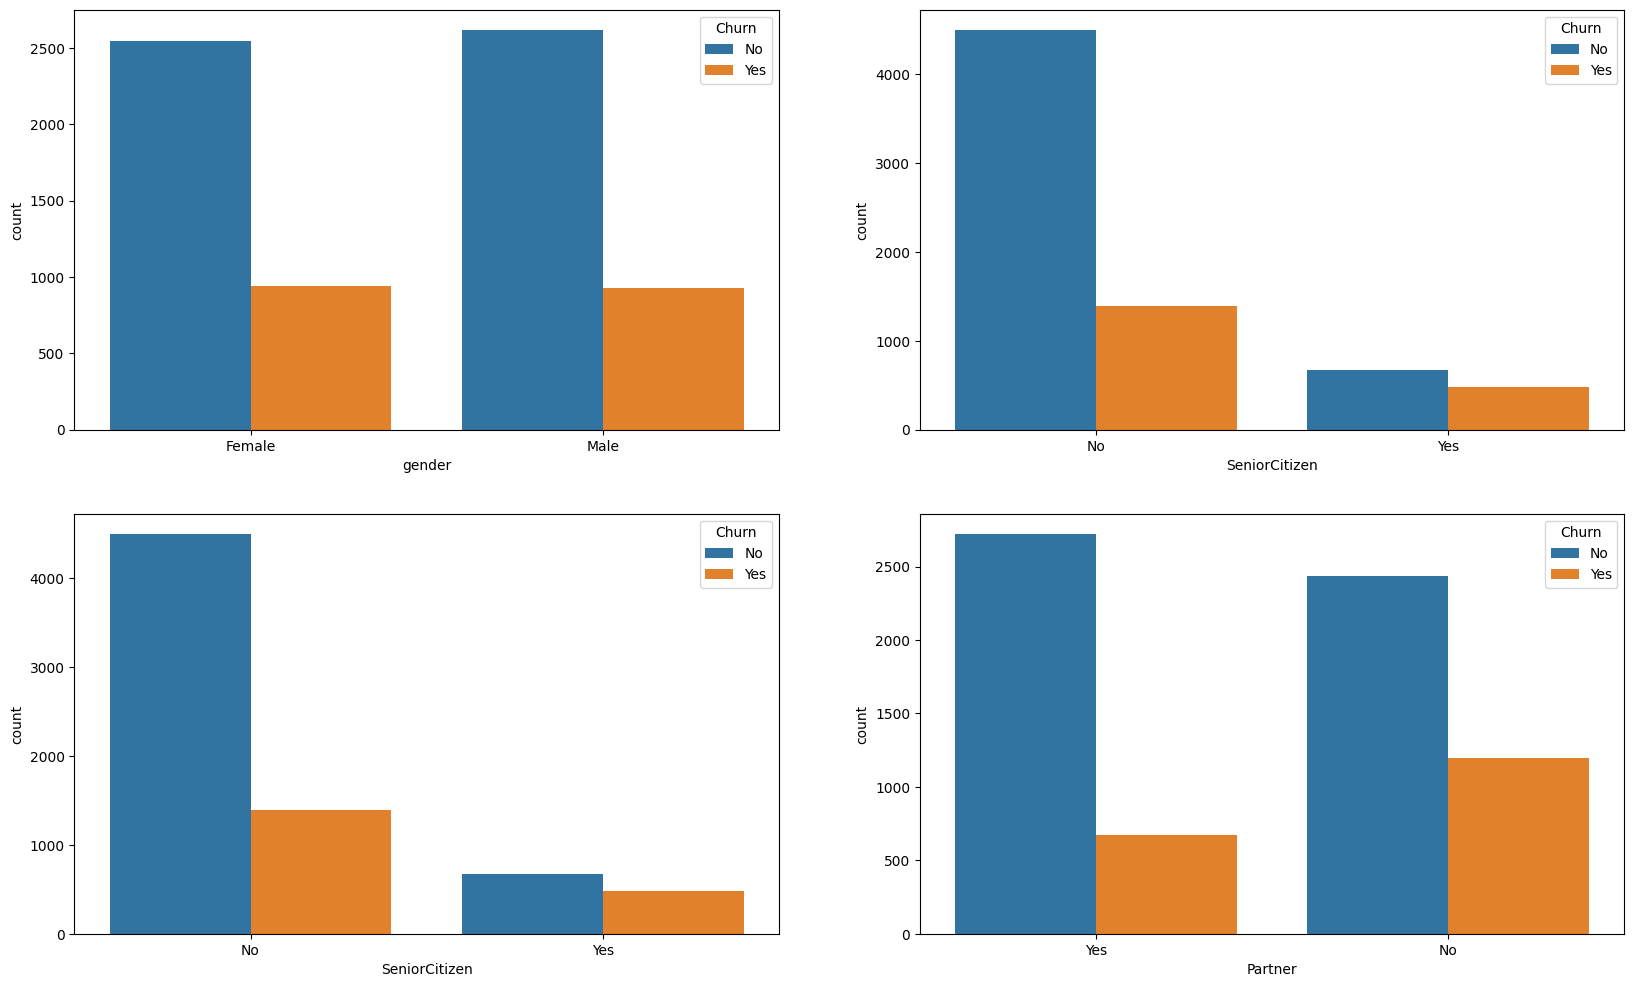

In [14]:
fig, ax = plt.subplots(2,2, figsize=(20, 12))

for i in range(0,2):
    for j in range(0,2):
        sns.countplot(data = df, x = categ_columns[i+j], hue = 'Churn', ax = ax[i,j])
        

plt.savefig('set1_countplot.png', bbox_inches='tight')
plt.show()

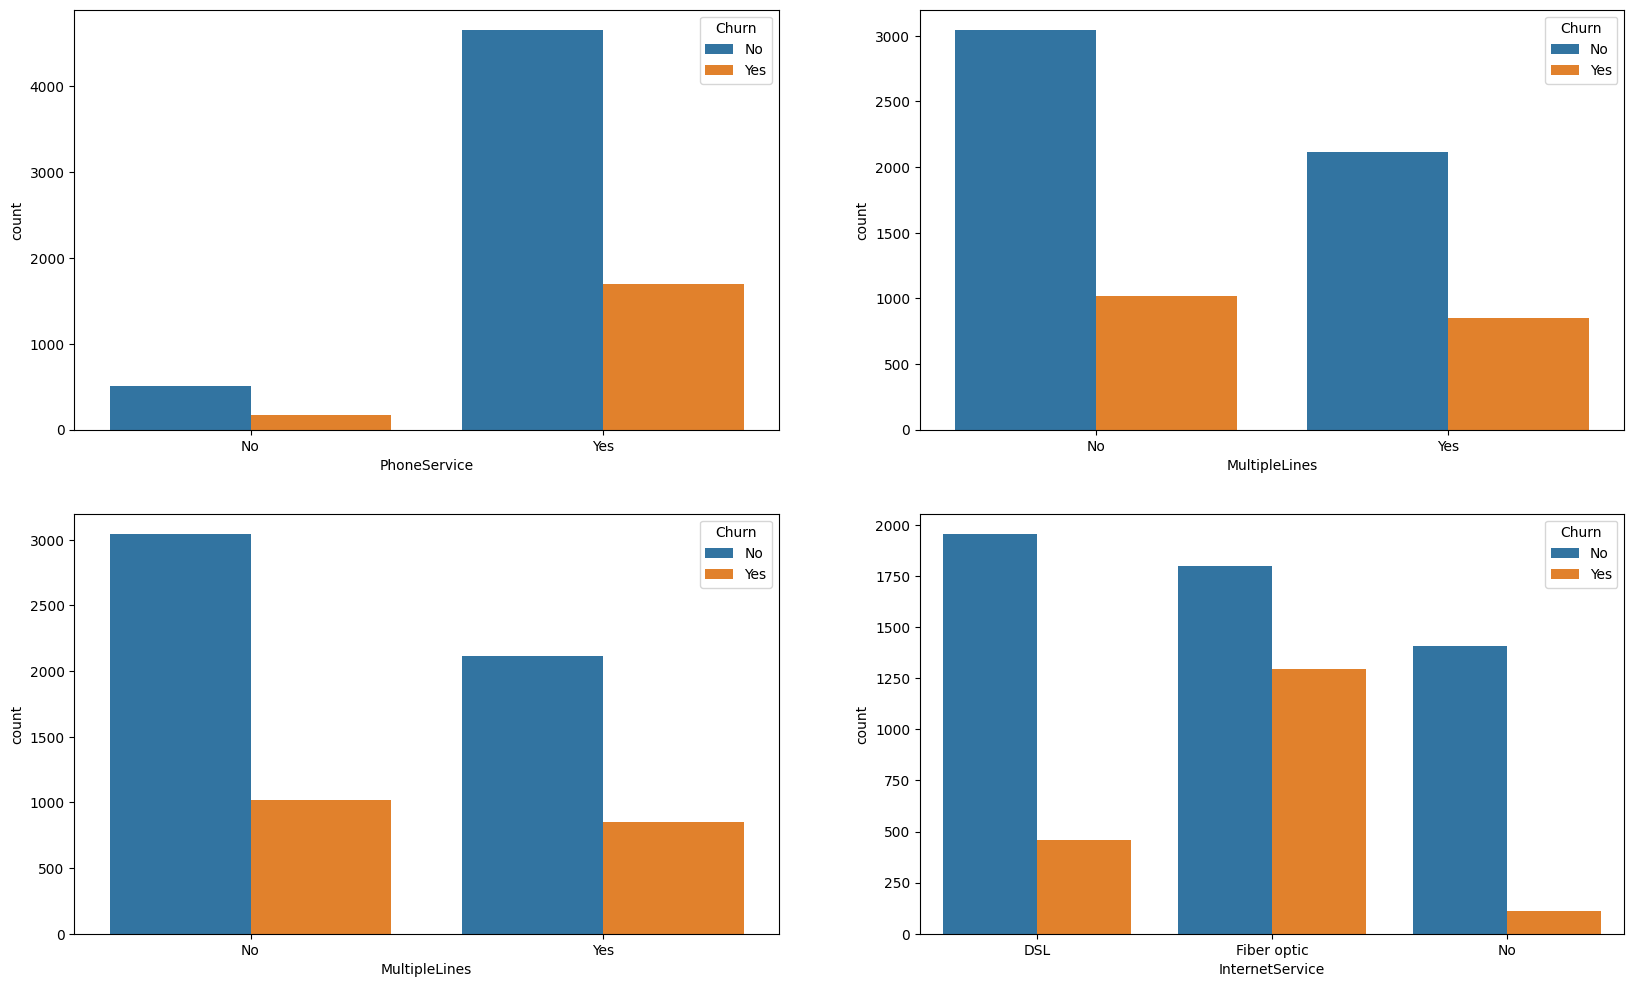

In [15]:
fig, ax = plt.subplots(2,2, figsize=(20, 12))

for i in range(0,2):
    for j in range(0,2):
        sns.countplot(data = df, x = categ_columns[i+j+4], hue = 'Churn', ax = ax[i,j])
        

plt.savefig('set2_countplot.png', bbox_inches='tight')
plt.show()

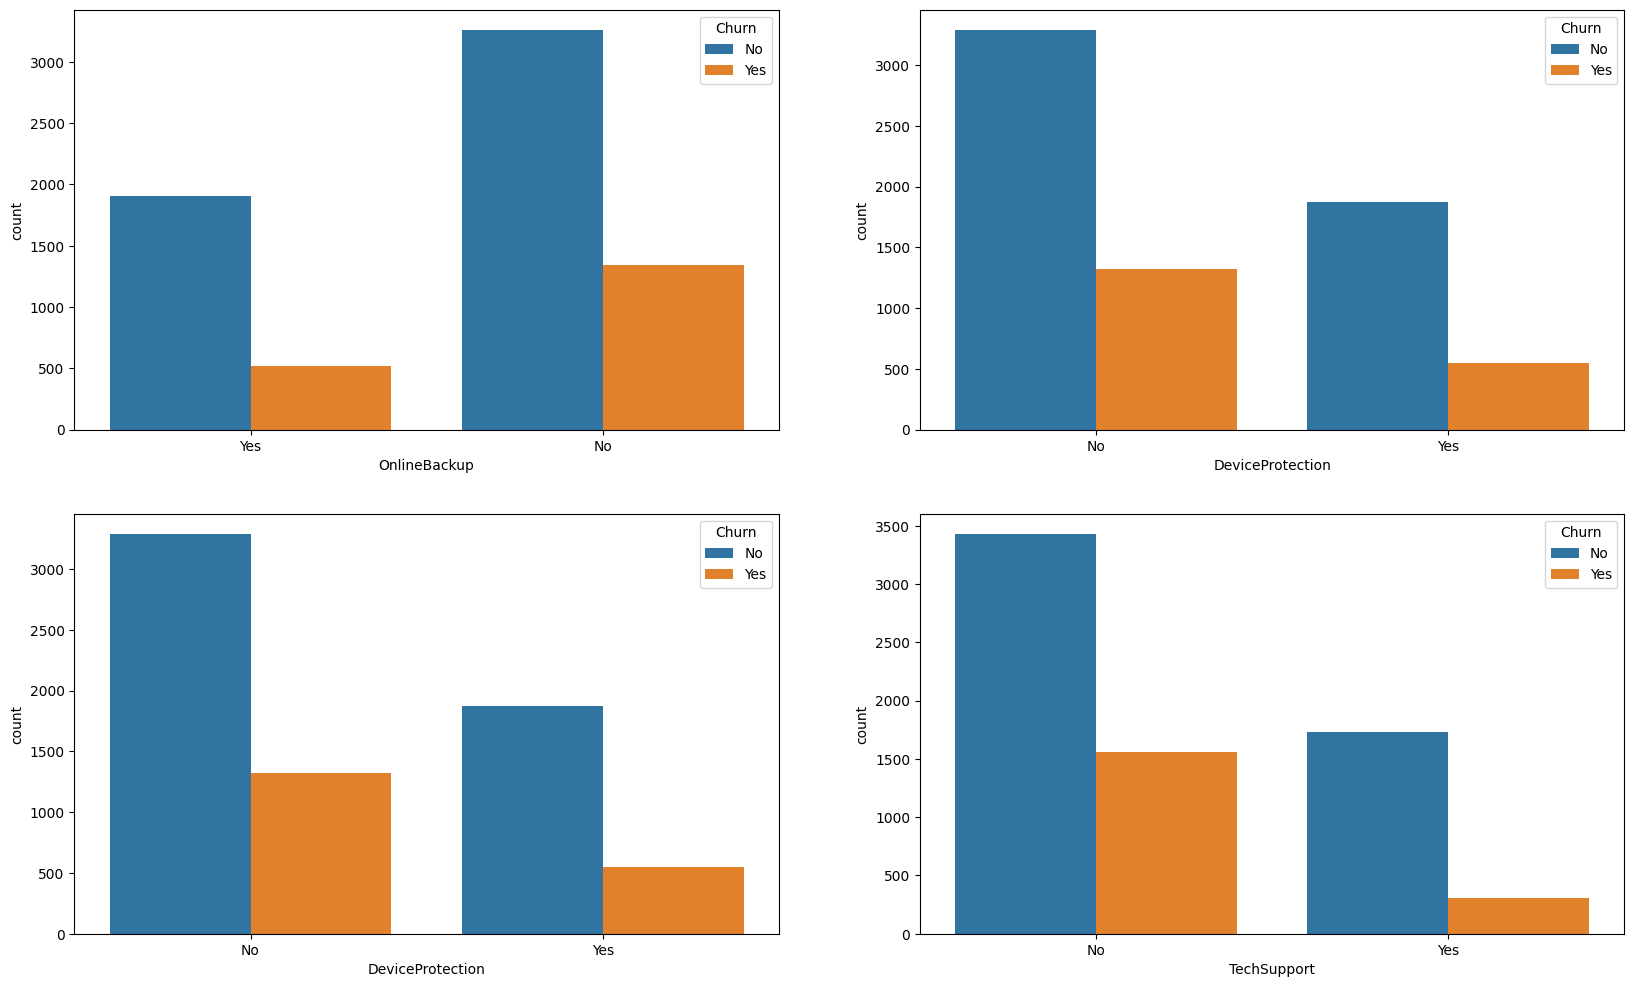

In [16]:
fig, ax = plt.subplots(2,2, figsize=(20, 12))

for i in range(0,2):
    for j in range(0,2):
        sns.countplot(data = df, x = categ_columns[i+j+8], hue = 'Churn', ax = ax[i,j])
        

plt.savefig('set3_countplot.png', bbox_inches='tight')
plt.show()

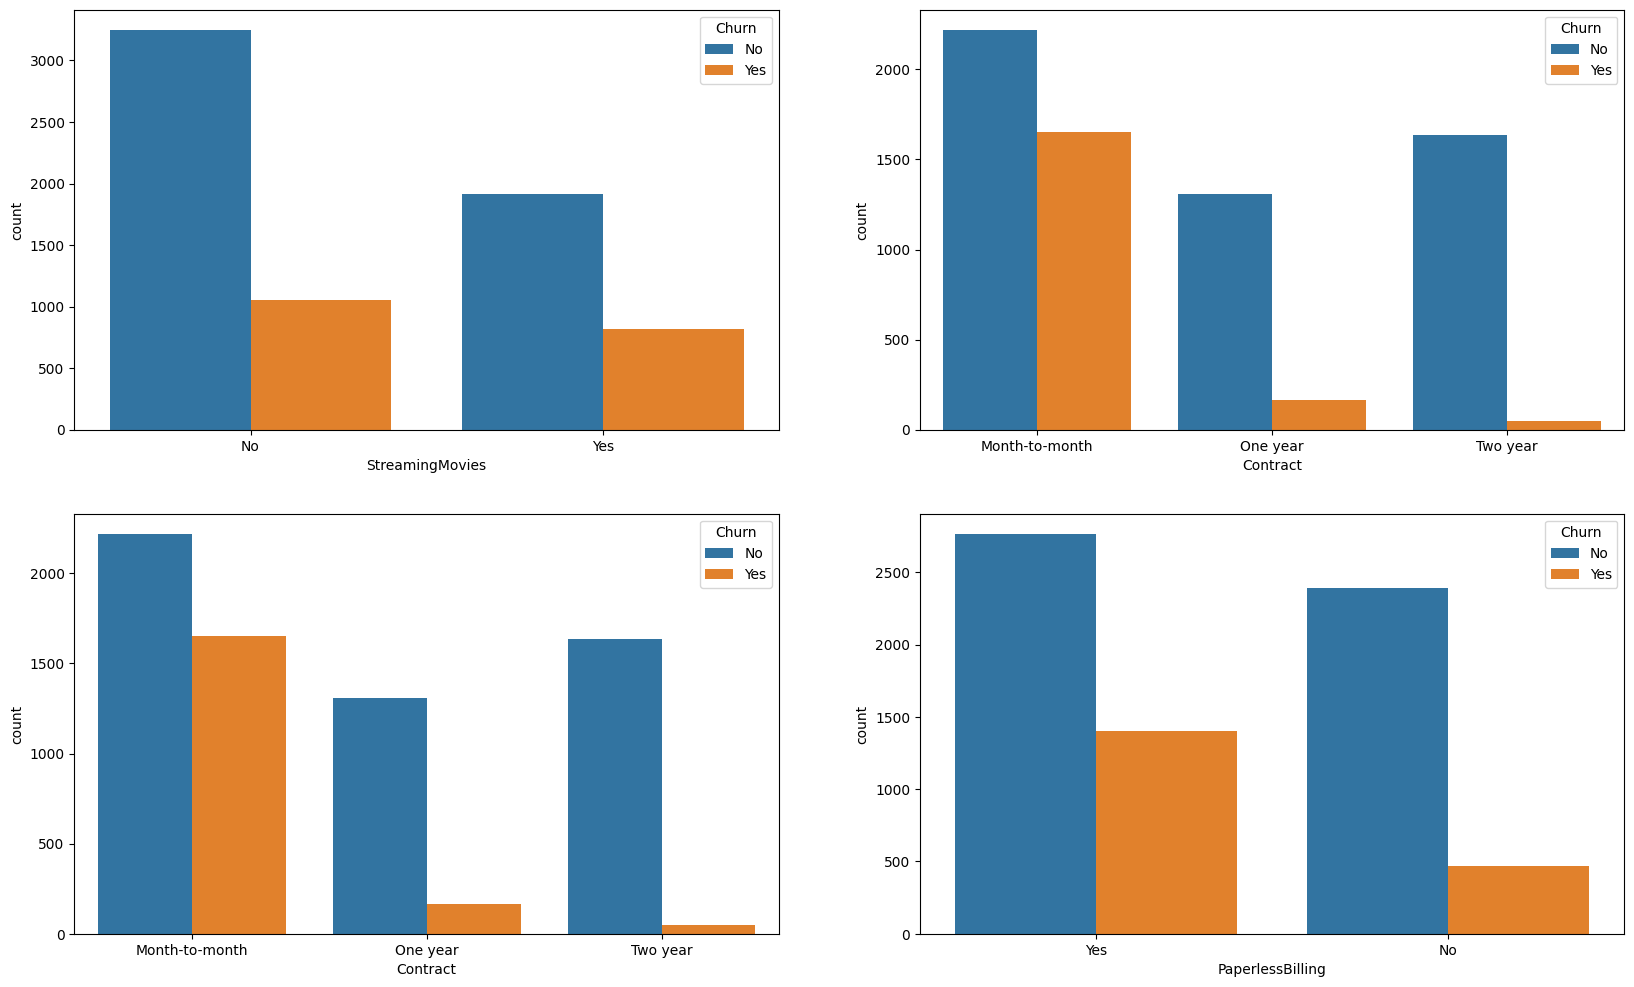

In [17]:
fig, ax = plt.subplots(2,2, figsize=(20, 12))

for i in range(0,2):
    for j in range(0,2):
        sns.countplot(data = df, x = categ_columns[i+j+12], hue = 'Churn', ax = ax[i,j])
        
plt.savefig('set4_countplot.png', bbox_inches='tight')
plt.show()

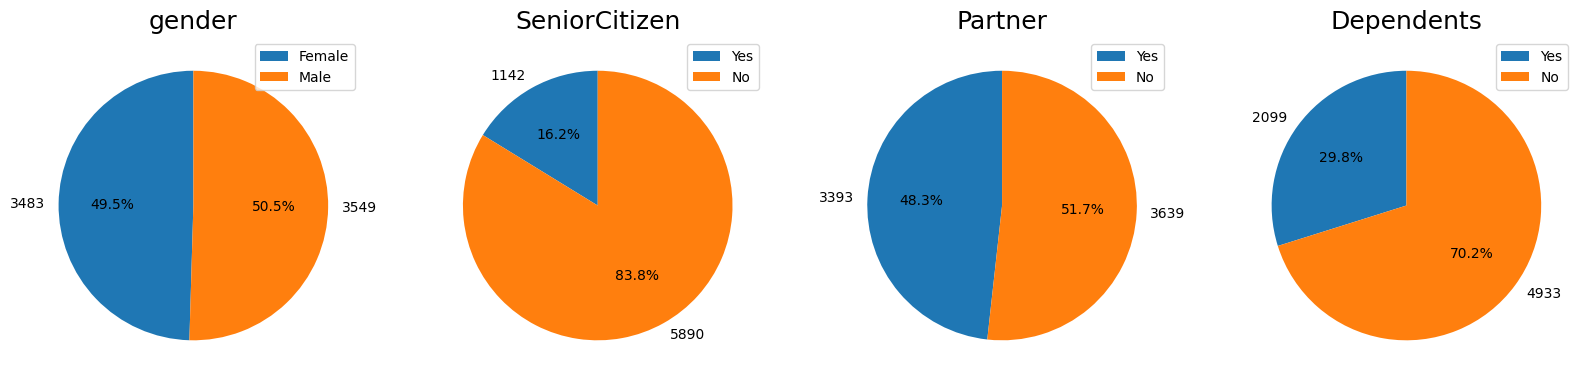

In [18]:


fig, axes = plt.subplots(1, 4, figsize=(20, 12))

for i, column in enumerate(categ_columns[:4]):
    ax = axes[i]
    data = df[column].value_counts().sort_values()
    ax.pie(data, labels=data.values,autopct="%1.1f%%", startangle = 90)
    ax.set_title(column,size=18)
    ax.legend(data.index)
plt.savefig('set1_pie.png', bbox_inches='tight')

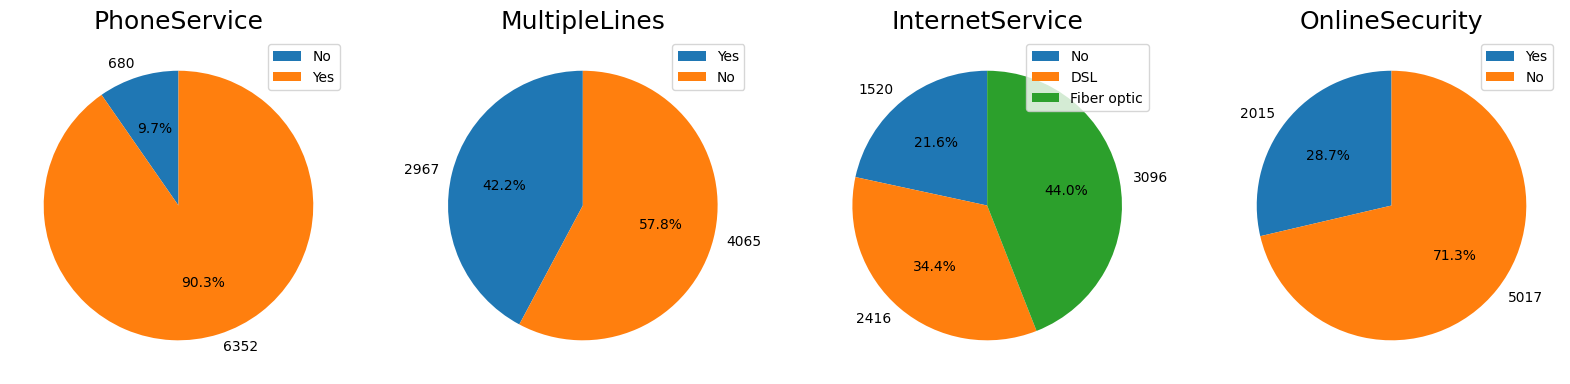

In [19]:
fig, axes = plt.subplots(1, 4, figsize=(20, 12))

for i, column in enumerate(categ_columns[4:8]):
    ax = axes[i]
    data = df[column].value_counts().sort_values()
    ax.pie(data, labels=data.values,autopct="%1.1f%%", startangle = 90)
    ax.set_title(column,size=18)
    ax.legend(data.index)
plt.savefig('set2_pie.png', bbox_inches='tight')

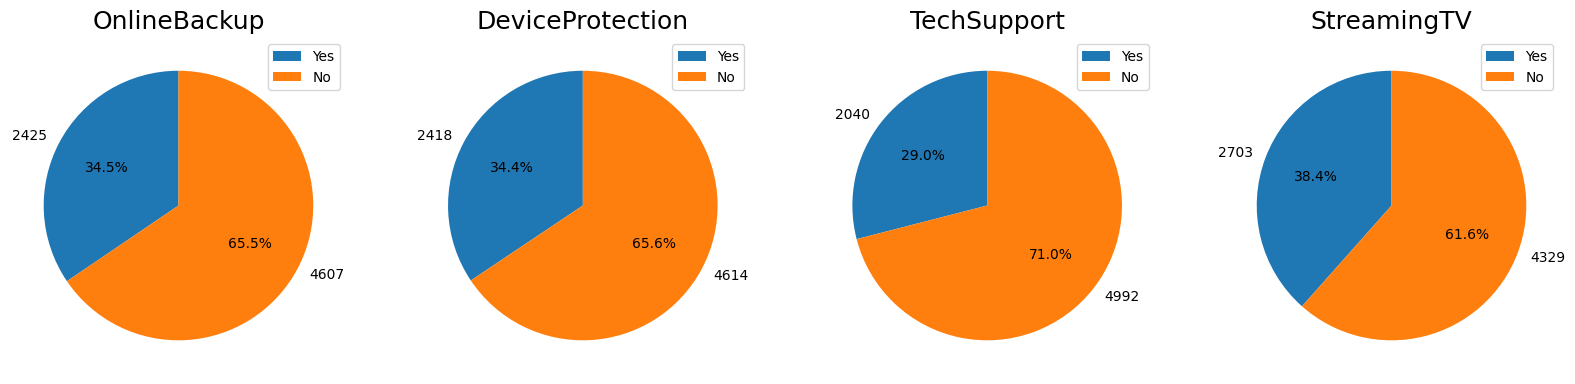

In [20]:
fig, axes = plt.subplots(1, 4, figsize=(20, 12))

for i, column in enumerate(categ_columns[8:12]):
    ax = axes[i]
    data = df[column].value_counts().sort_values()
    ax.pie(data, labels=data.values,autopct="%1.1f%%", startangle = 90)
    ax.set_title(column,size=18)
    ax.legend(data.index)
plt.savefig('set3_pie.png', bbox_inches='tight')

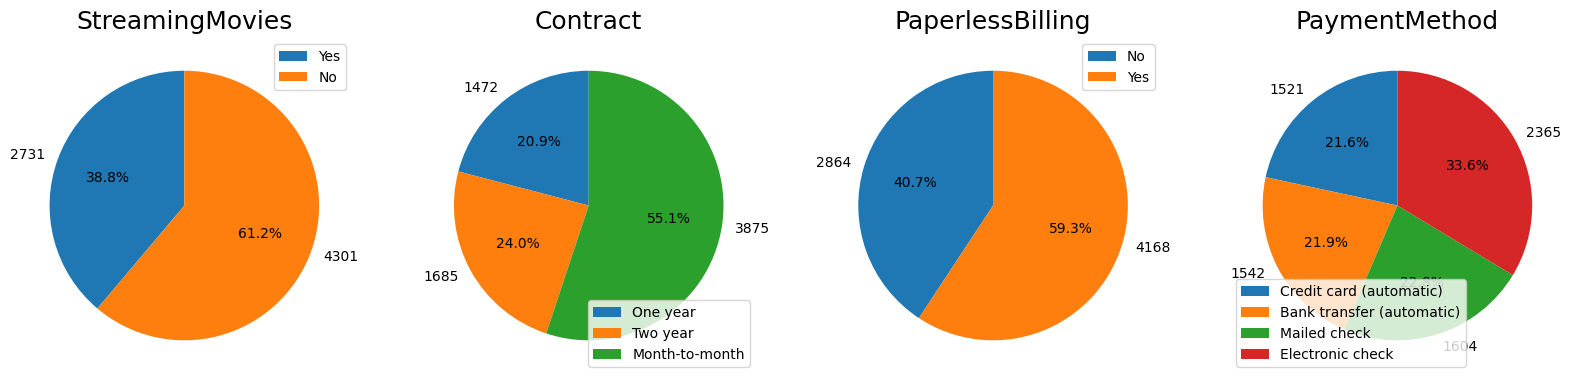

In [21]:
fig, axes = plt.subplots(1, 4, figsize=(20, 12))

for i, column in enumerate(categ_columns[12:]):
    ax = axes[i]
    data = df[column].value_counts().sort_values()
    ax.pie(data, labels=data.values,autopct="%1.1f%%", startangle = 90)
    ax.set_title(column,size=18)
    ax.legend(data.index)
plt.savefig('set4_pie.png', bbox_inches='tight')

**Distribution of Total Charges by Churn**

The first boxplot below suggests that individuals categorized as Churners or Churned customers show smaller total charges in comparison to non-churners. Churners do not complete the contract, implying a likelihood of lower total charges compared to non-churners. To delve deeper into this data, the boxplot has been organized based on their respective contracts.

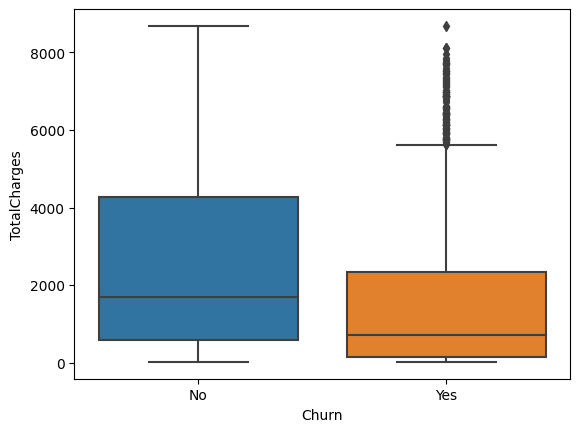

In [22]:
sns.boxplot(data = df, x = 'Churn', y = 'TotalCharges')
plt.savefig('totChargeDist.png', bbox_inches='tight')

Surprisingly, it appears that customers with one-year and two-year contracts have higher total charges, which implies that different contract durations might contribute in influencing the total charges incurred by customers. Further, this means that after having their one-year and two-year contracts, customers are more likely to churn if they are having more total charge.

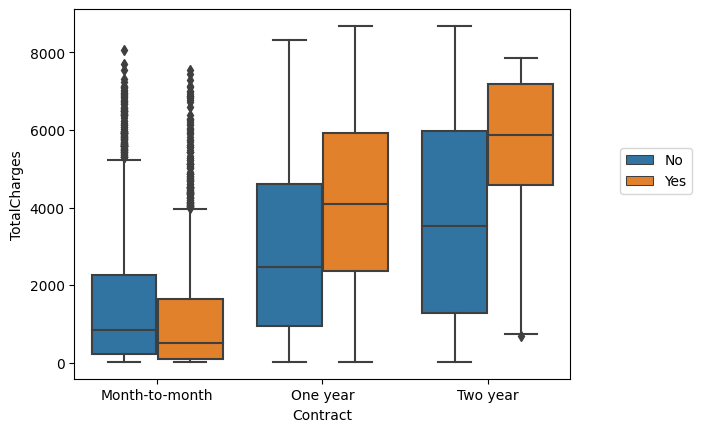

In [23]:
sns.boxplot(data=df,y='TotalCharges',x='Contract',hue='Churn')
plt.legend(loc=(1.1,0.5))
plt.savefig('totChargeContractDist.png', bbox_inches='tight')

Correlation

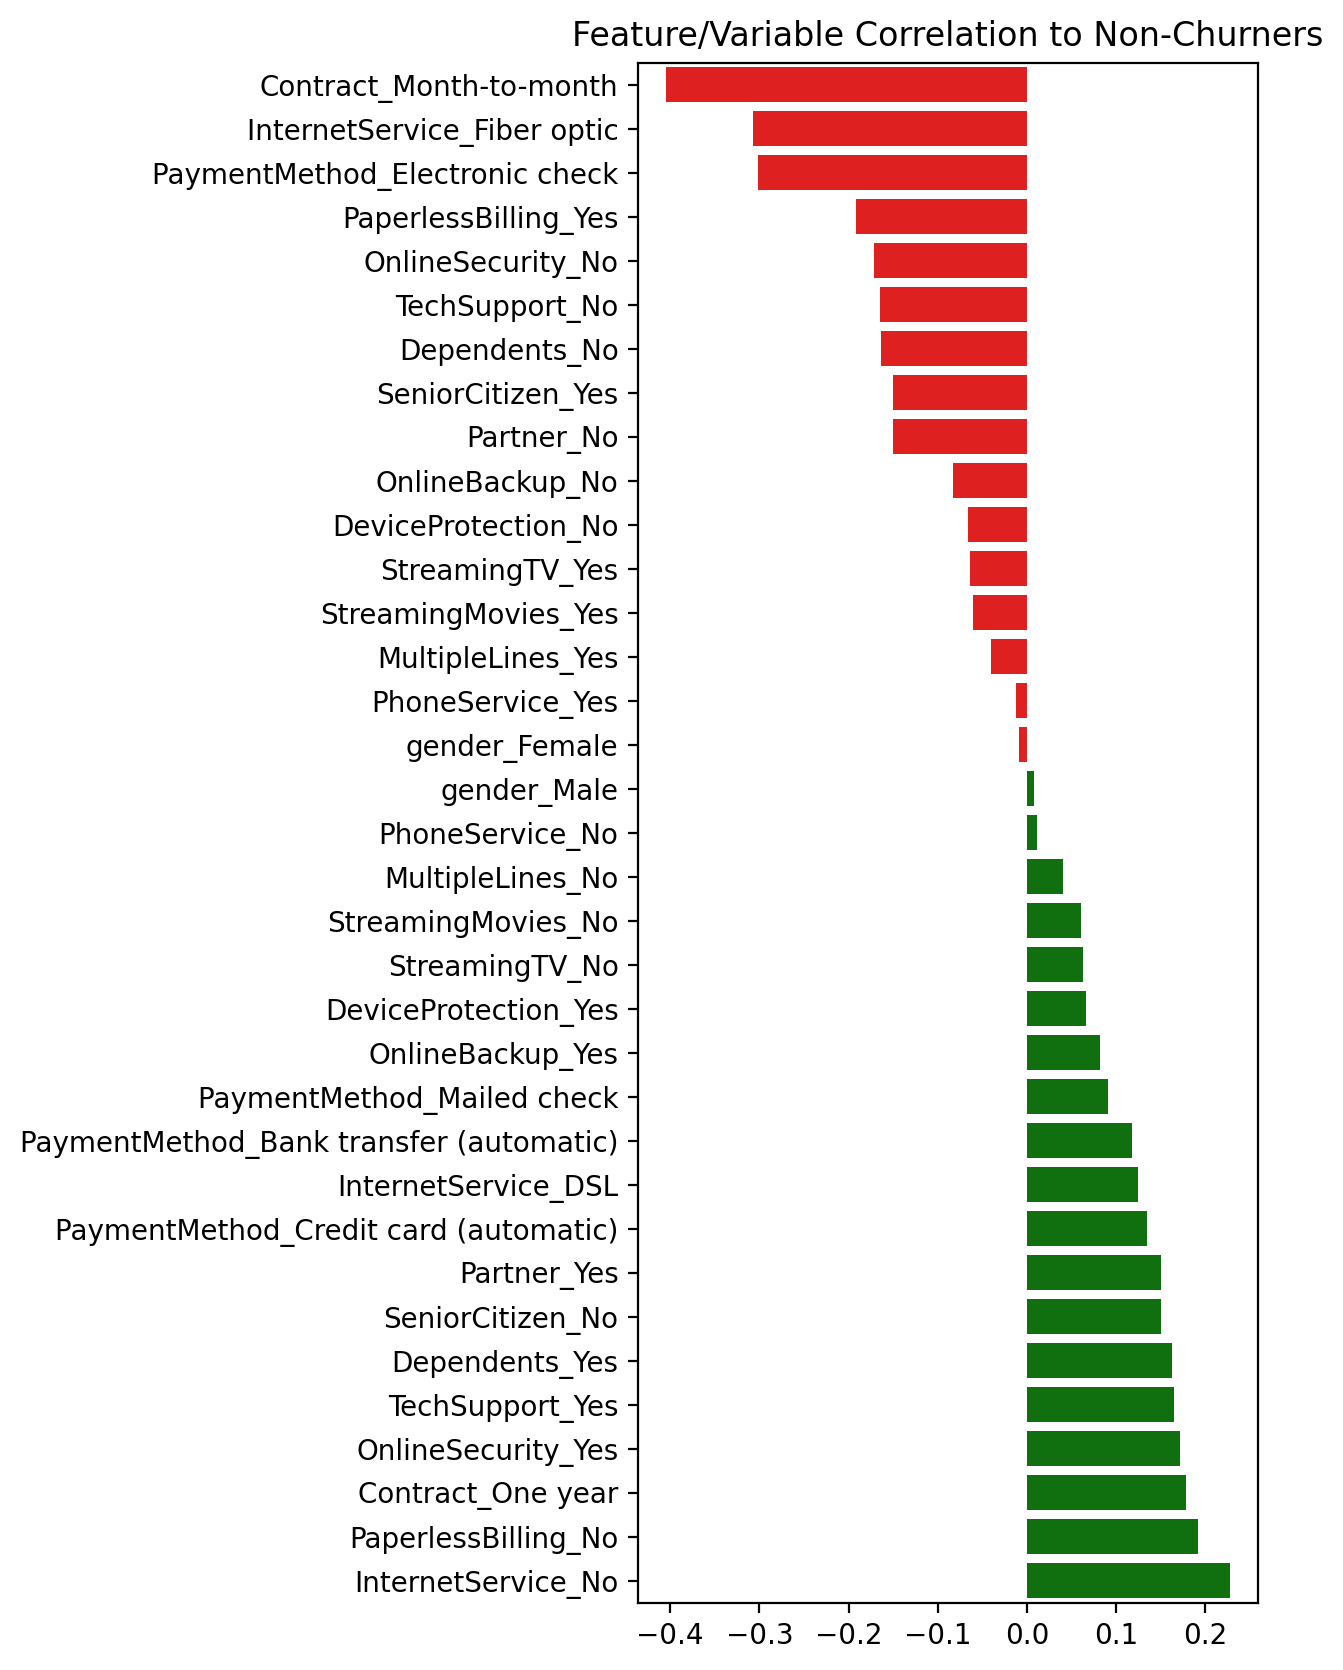

In [24]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

#exclude Churn_No and Churn_Yes
plt.figure(figsize=(4,10),dpi=200)
colors = ['g' if c >= 0 else 'r' for c in corr_df['Churn_No'].sort_values().iloc[1:-2]]
g = sns.barplot(
    y=corr_df['Churn_No'].sort_values().iloc[1:-2].index,
    x=corr_df['Churn_No'].sort_values().iloc[1:-2].values,
    palette=colors
)

#corr_df['Churn_No'].iloc[1:-2].plot(kind = 'barh'
#                        , color = (corr_df['Churn_No'].iloc[1:-2] > 0).map({True: 'g'
#                                                                , False: 'r'}))
plt.title("Feature/Variable Correlation to Non-Churners")
plt.savefig('corr.png', bbox_inches='tight')

In [25]:
corr_df.style.background_gradient(cmap = 'coolwarm')

Analysis on Churn

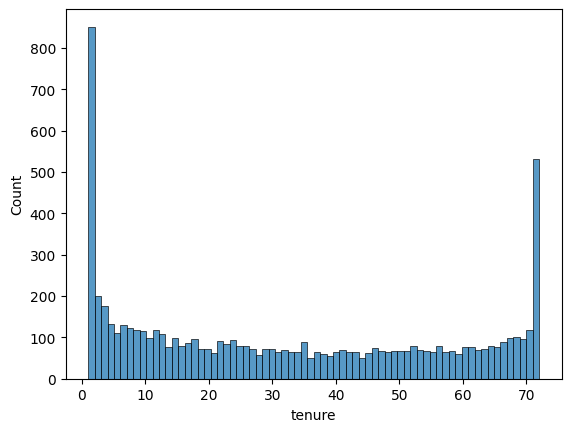

In [26]:
sns.histplot(data=df,x='tenure', bins = 70)
plt.savefig('histTenure.png', bbox_inches='tight')

Based on the Histogram below, customers are likely to churn if they are on a month-to-month contract.

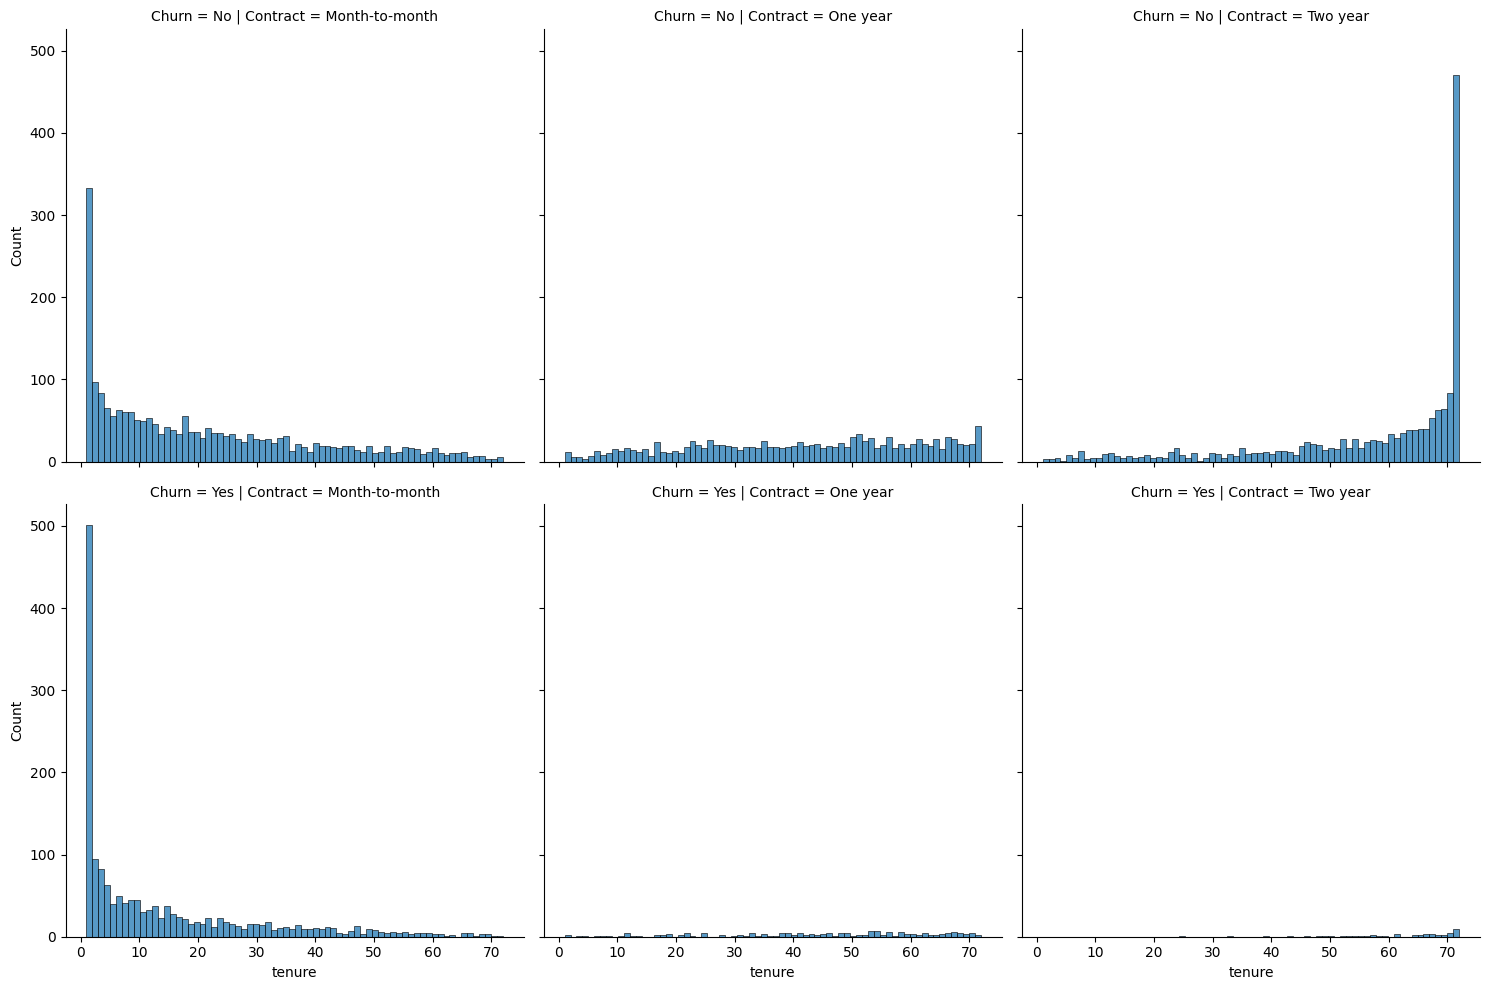

In [27]:
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn')
plt.savefig('histContTenure.png', bbox_inches='tight')

Customers tend to churn when their monthly charges are high

Text(0, 0.5, 'Total Charges')

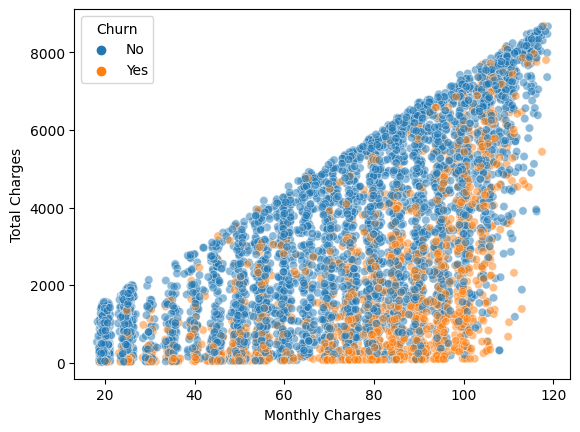

In [28]:
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn', linewidth=0.5,alpha=0.5)
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')

**Tenure - Monthly Cohorts**

In [29]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

churn_rate = 100 * yes_churn / (no_churn+yes_churn)

In [30]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

Text(0.5, 0, 'Tenure')

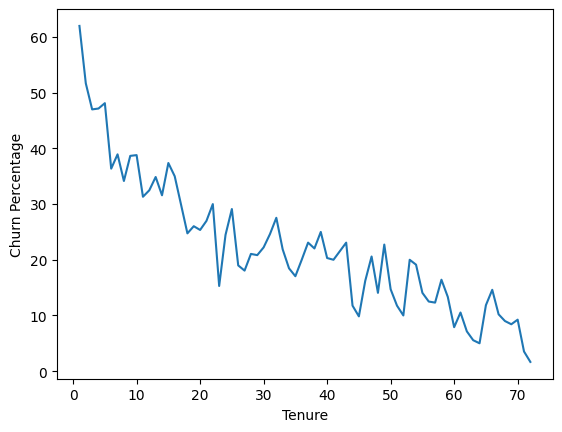

In [31]:
churn_rate.transpose()['customerID'].plot()
plt.ylabel('Churn Percentage')
plt.xlabel('Tenure')

**Tenure - Yearly Cohorts**

In [32]:
def cohort(tenure):
    if tenure < 13:
        return '<1 year'
    elif tenure < 25:
        return '1-2 years'
    elif tenure < 36:
        return '2-3 years'
    elif tenure < 49:
        return '3-4 years'
    else:
        return 'More than 4 years'
    
df['TenureYearly'] = df['tenure'].apply(cohort)

In [33]:
df[['tenure','TenureYearly']].head()

tenure TenureYearly
0       1      <1 year
1      34    2-3 years
2       2      <1 year
3      45    3-4 years
4       2      <1 year

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

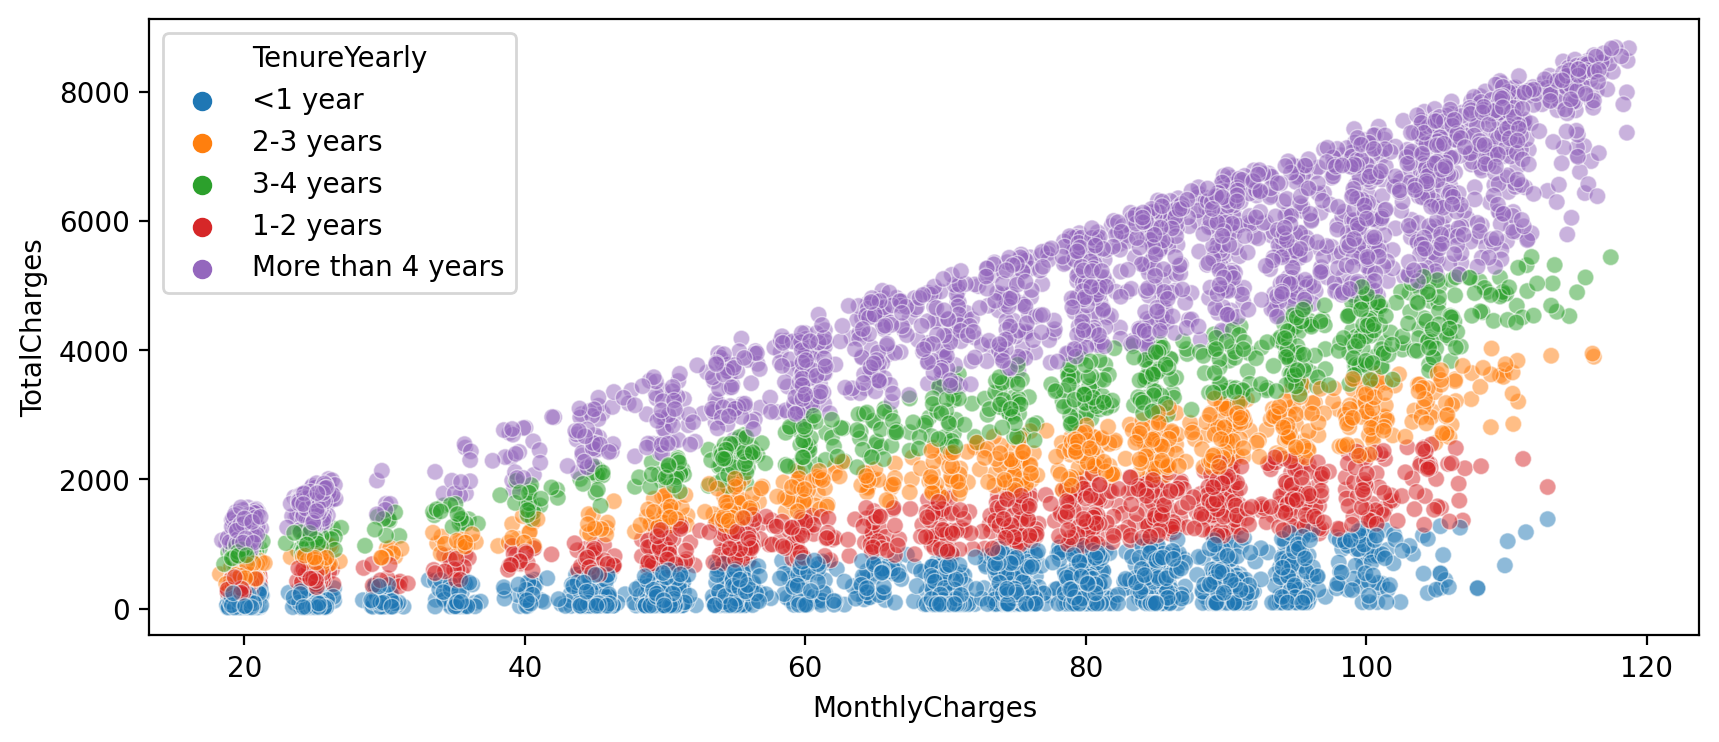

In [34]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='TenureYearly', linewidth=0.5,alpha=0.5)

Aside from the More than 4 years cohort, it's a bit difficult to identify which cohort has the highest count.

<Axes: xlabel='TenureYearly', ylabel='count'>

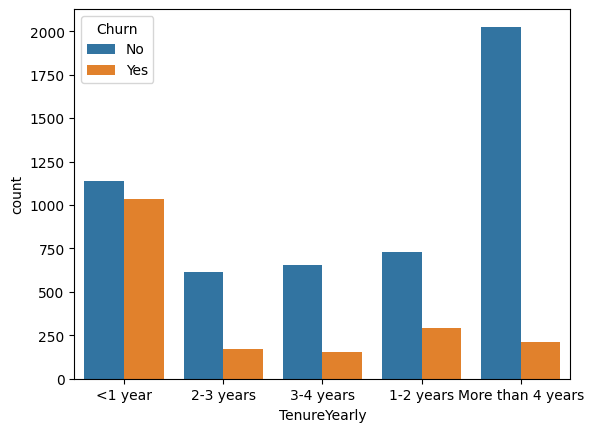

In [35]:
sns.countplot(data=df,x='TenureYearly',hue='Churn')

<Figure size 1000x400 with 0 Axes>

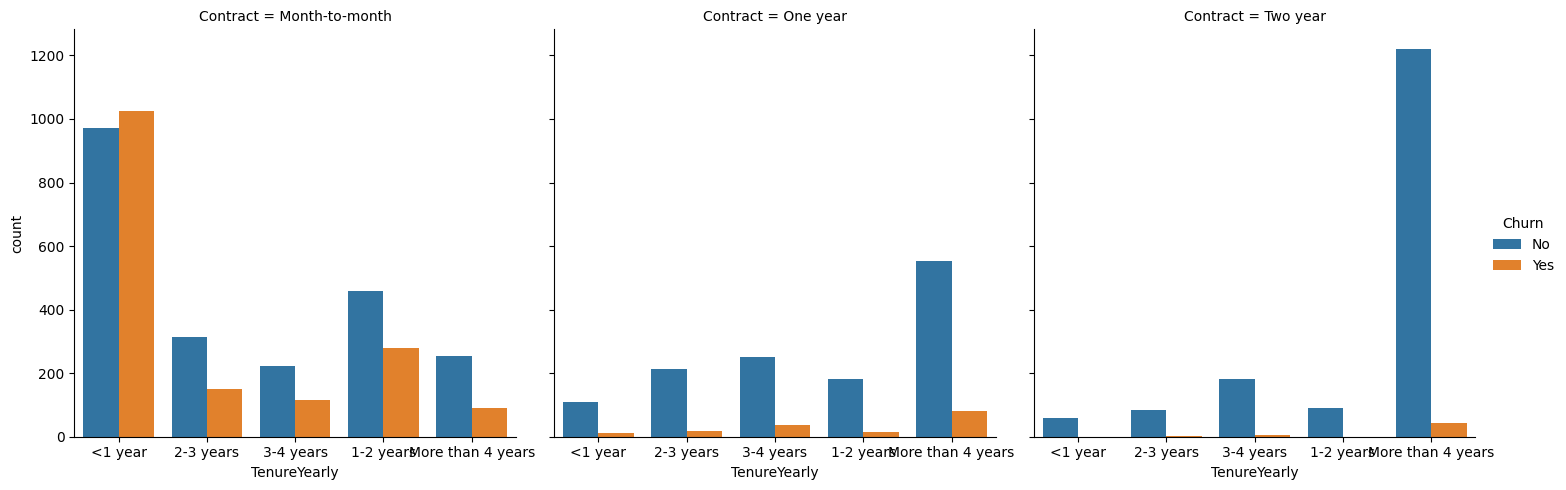

In [36]:
plt.figure(figsize=(10,4))
sns.catplot(data=df,x='TenureYearly',hue='Churn',col='Contract',kind='count')

**Data Pre-processing**

In [37]:
yes_no = ["Partner","Dependents","PhoneService","MultipleLines","OnlineBackup",
         "OnlineSecurity","DeviceProtection","TechSupport","StreamingTV",
         "StreamingMovies","PaperlessBilling","Churn", "SeniorCitizen"]

for column in yes_no:
    df[column].replace({"Yes":1,"No":0}, inplace = True)

In [38]:
df.gender.replace({"Male":1, "Female":0}, inplace = True)

In [39]:
df1 = pd.get_dummies(data = df, columns = ["InternetService","Contract","PaymentMethod"])

In [40]:
for col in df1.columns:
    if df1[col].dtypes == "bool":
        df1[col] = df1[col].astype(int)

In [41]:
scaler = StandardScaler()

df1[["tenure","MonthlyCharges","TotalCharges"]] = scaler.fit_transform(df[["tenure","MonthlyCharges","TotalCharges"]])

**Predictive Modeling**

Separate the scaled data into X Features and Y label

In [42]:
X = df1.drop(['Churn','customerID','TenureYearly'],axis=1)
y = df1['Churn']

In [43]:
X.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0 -1.280248             0   
1       1              0        0           0  0.064303             1   
2       1              0        0           0 -1.239504             1   
3       1              0        0           0  0.512486             0   
4       0              0        0           0 -1.239504             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                    1                            0                   0   
1                    1                            0                   0   
2                    1                            0                   0   
3                    1                            0                   0   
4                    0                            1                   0   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                        1                  0                  0   
1                        0                  1                  0   
2                        1                  0                  0   
3                        0                  1                  0   
4                        1                  0                  0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 26 columns]

In [44]:
smote = SMOTE(random_state=0)

X_resample, y_resample = smote.fit_resample(X,y)

**Train test split**, holding out 20% of the data for testing. I'll use a random state of 256 for reproducible results

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=101)

In [46]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

In [47]:
def best_params (model, parameters, y_train1 = y_train, y_test1 = y_test):

    start = time.time()
    grid = GridSearchCV(model,
                        param_grid = parameters,
                        )
    X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
    grid_fit = grid.fit(X_train, y_train1)
    best = grid_fit.best_estimator_
    X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
    y_pred = best.predict(X_test)
    
    train_score =best.score(X_train, y_train1)
    test_score = best.score(X_test, y_test1)
    F1_score = f1_score(y_test1, y_pred).round(2)

    model_name = str(model).split('(')[0]

    end = time.time()
    takes_time = np.round(end - start,2)

    print(f"The best parameters for {model_name} model is: {grid_fit.best_params_}")
    print("--" * 10)
    print(f"(R2 score) in the training set is {train_score:0.2%} for {model_name} model.")
    print(f"(R2 score) in the testing set is {test_score:0.2%} for {model_name} model.")
    print(f"F1 score is {F1_score:,} for {model_name} model.")
    print("--" * 10)
    print(f"Runtime of the program is: {end - start:0.2f}")


    return best,train_score, test_score, F1_score, y_pred, takes_time



In [48]:
def confusion(model,pred, y_test1 = y_test):
    cm = confusion_matrix(y_test1, pred)
    dis = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    dis.plot()
    plt.title(str(model).split("(")[0])

In [49]:
def important_features(model_fit):
    imp_features = pd.DataFrame(data=model_fit.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")

    imp_features_filtered = imp_features[imp_features['Feature Importance'] > 0]
    model_name = str(model_fit).split('(')[0]
    plt.figure(figsize=(4,10),dpi=200)
    sns.barplot(
        y=imp_features_filtered['Feature Importance'].sort_values(ascending = False).index,
        x=imp_features_filtered['Feature Importance'].sort_values(ascending = False).values,
        color = 'cornflowerblue'
    )

    plt.title(f"Feature Importance for {model_name}")

**Logistic Regression Model**

In [50]:
logreg = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2','elasticnet'],
}

logreg_model, train_logreg, test_logreg, f1_logreg, pred_logreg, time_logreg = best_params(logreg, param_grid)

The best parameters for LogisticRegression model is: {'C': 10, 'penalty': 'l2'}
--------------------
(R2 score) in the training set is 81.55% for LogisticRegression model.
(R2 score) in the testing set is 82.38% for LogisticRegression model.
F1 score is 0.83 for LogisticRegression model.
--------------------
Runtime of the program is: 6.04


In [51]:
print(classification_report(y_test,pred_logreg))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1030
           1       0.81      0.84      0.83      1036

    accuracy                           0.82      2066
   macro avg       0.82      0.82      0.82      2066
weighted avg       0.82      0.82      0.82      2066



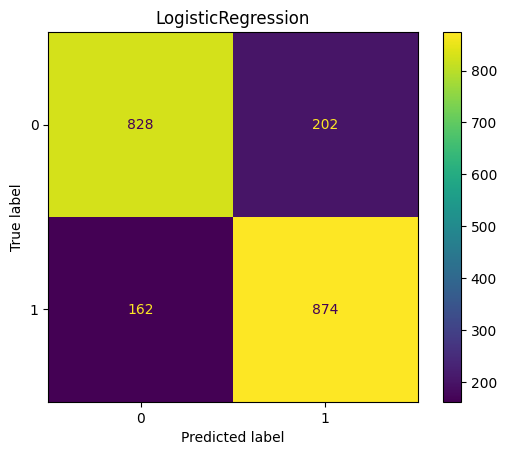

In [52]:
confusion(logreg,pred_logreg)

**Support Vector Machine**

In [53]:
svc = SVC(class_weight='balanced')
param_grid = {'C':[0.001,0.01,0.1,0.5,1]
              ,'gamma':['scale','auto']}
svc_fit, train_svc, test_svc, f1_svc, pred_svc, time_svc = best_params(svc, param_grid)

The best parameters for SVC model is: {'C': 1, 'gamma': 'scale'}
--------------------
(R2 score) in the training set is 83.16% for SVC model.
(R2 score) in the testing set is 82.58% for SVC model.
F1 score is 0.83 for SVC model.
--------------------
Runtime of the program is: 150.94


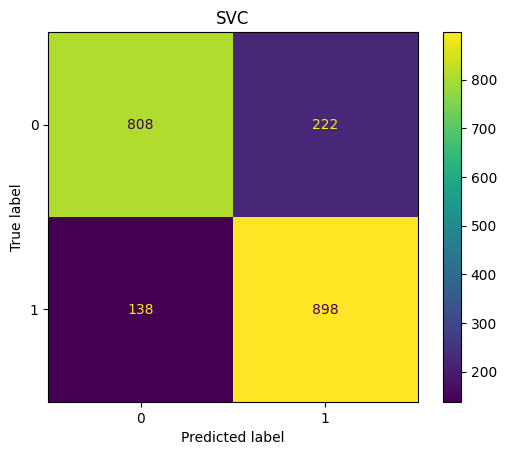

In [54]:
confusion(svc,pred_svc)

**K Nearest Neighbors**

**Decision Tree classifier**

In [55]:
dt = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_fit, train_dt, test_dt, f1_dt, pred_dt, time_dt = best_params(dt, param_grid)

The best parameters for DecisionTreeClassifier model is: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
--------------------
(R2 score) in the training set is 85.75% for DecisionTreeClassifier model.
(R2 score) in the testing set is 79.91% for DecisionTreeClassifier model.
F1 score is 0.81 for DecisionTreeClassifier model.
--------------------
Runtime of the program is: 17.81


In [56]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1030
           1       0.78      0.83      0.81      1036

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



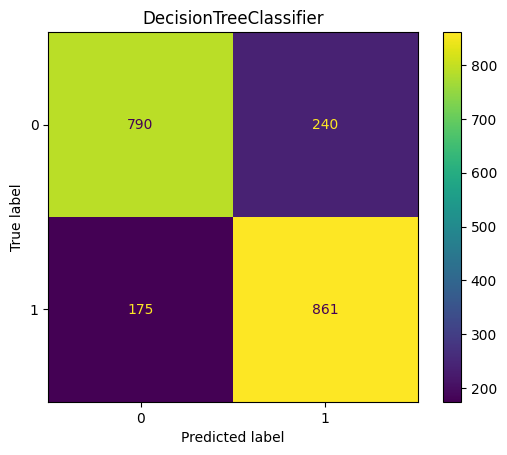

In [57]:
confusion(dt,pred_dt)

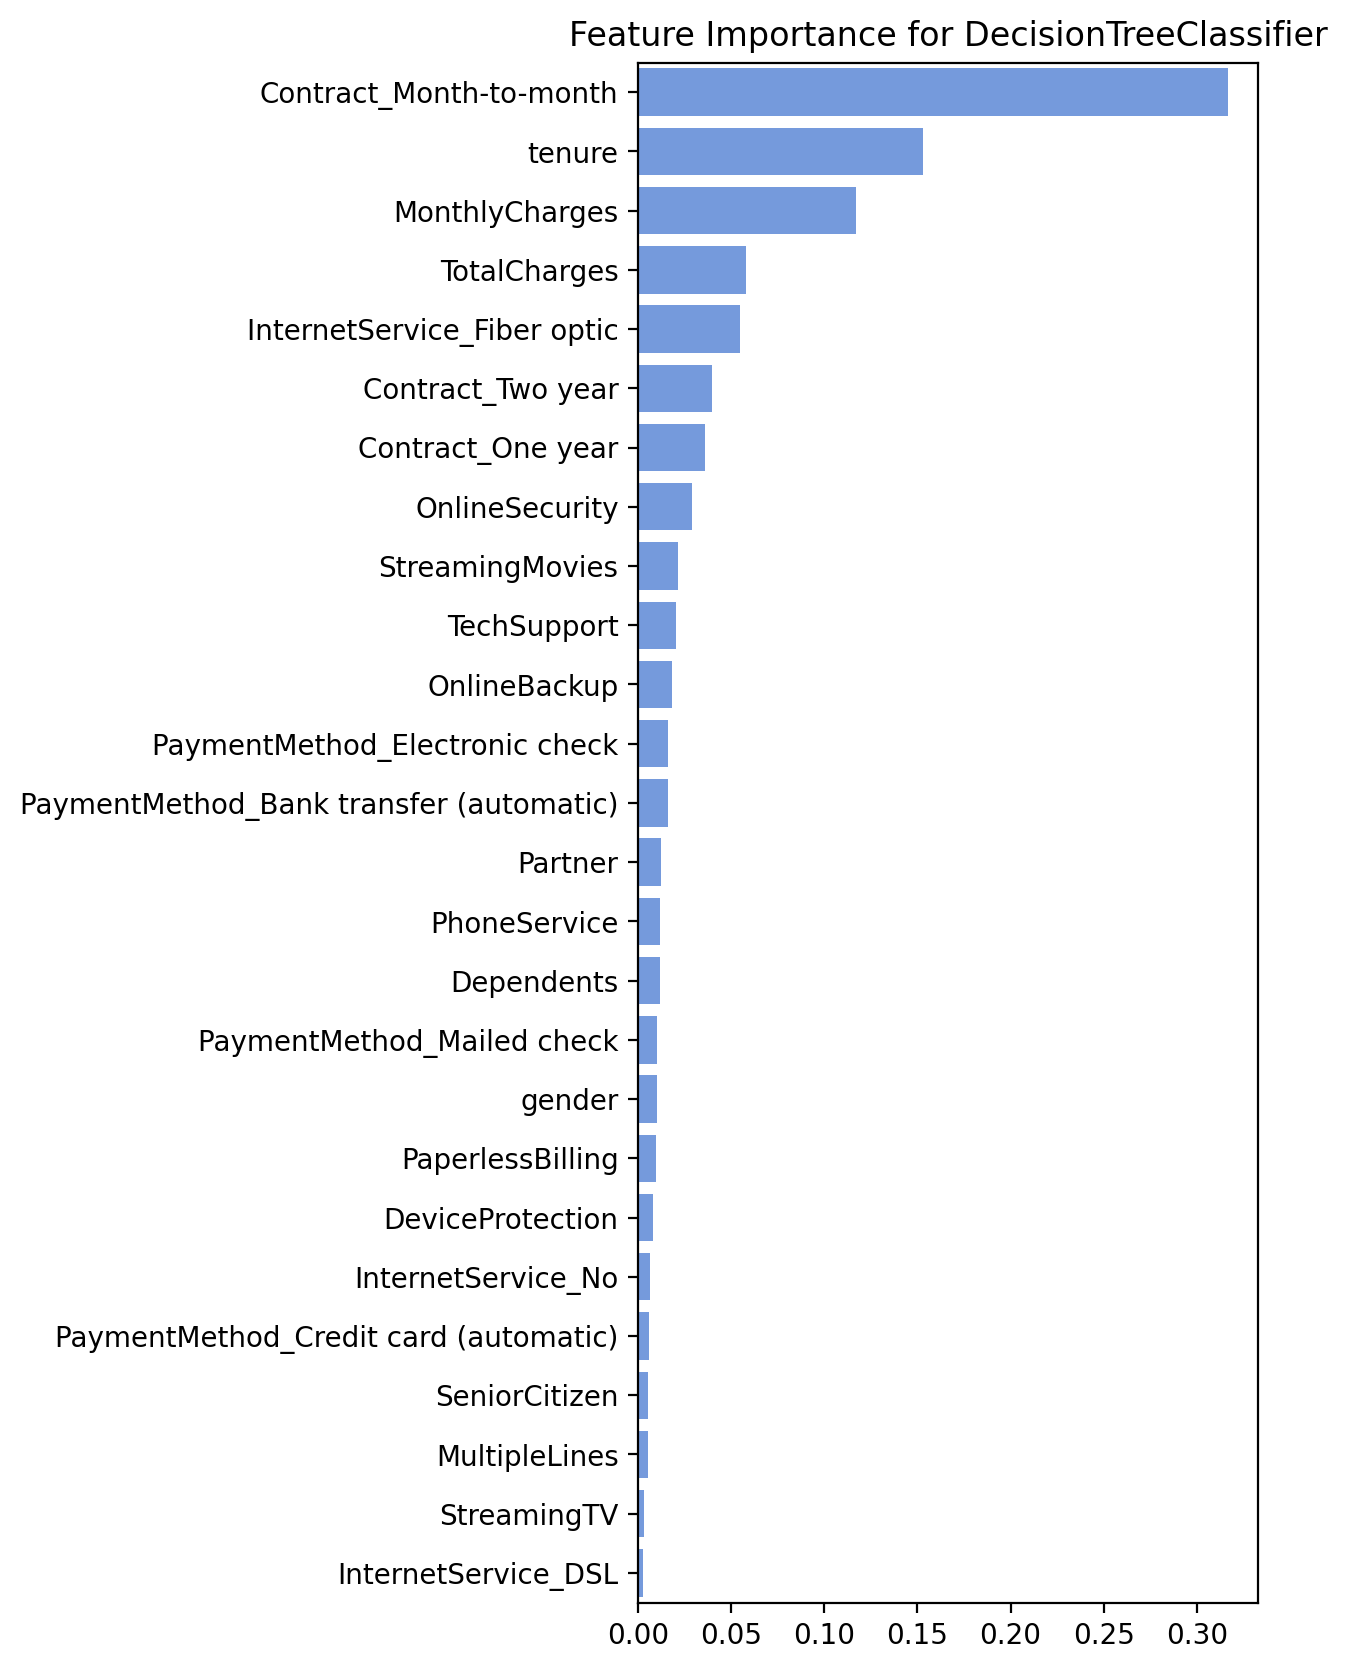

In [58]:
important_features(dt_fit)

In [59]:
#plt.figure(figsize=(12,8), dpi = 300)
#plot_tree(dt,filled=True,feature_names=X.columns)
#plt.show()

**Random Forest Classifier**

In [60]:
rf_model = RandomForestClassifier(random_state=101)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None,3,7, 5, 10,]
}

rf_fit, train_rf, test_rf, f1_rf, pred_rf, time_rf = best_params(rf_model, param_grid)

The best parameters for RandomForestClassifier model is: {'max_depth': None, 'n_estimators': 200}
--------------------
(R2 score) in the training set is 99.84% for RandomForestClassifier model.
(R2 score) in the testing set is 85.14% for RandomForestClassifier model.
F1 score is 0.85 for RandomForestClassifier model.
--------------------
Runtime of the program is: 77.35


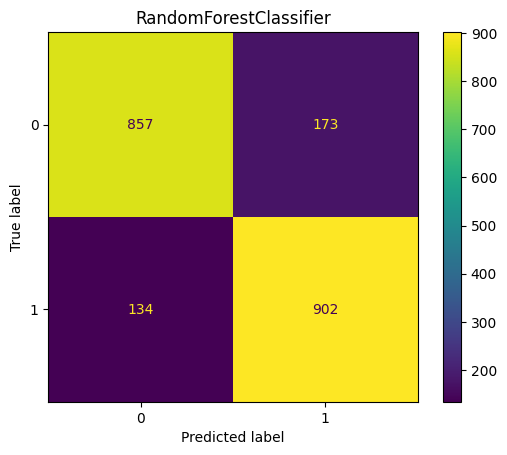

In [61]:
confusion(rf_model,pred_rf)

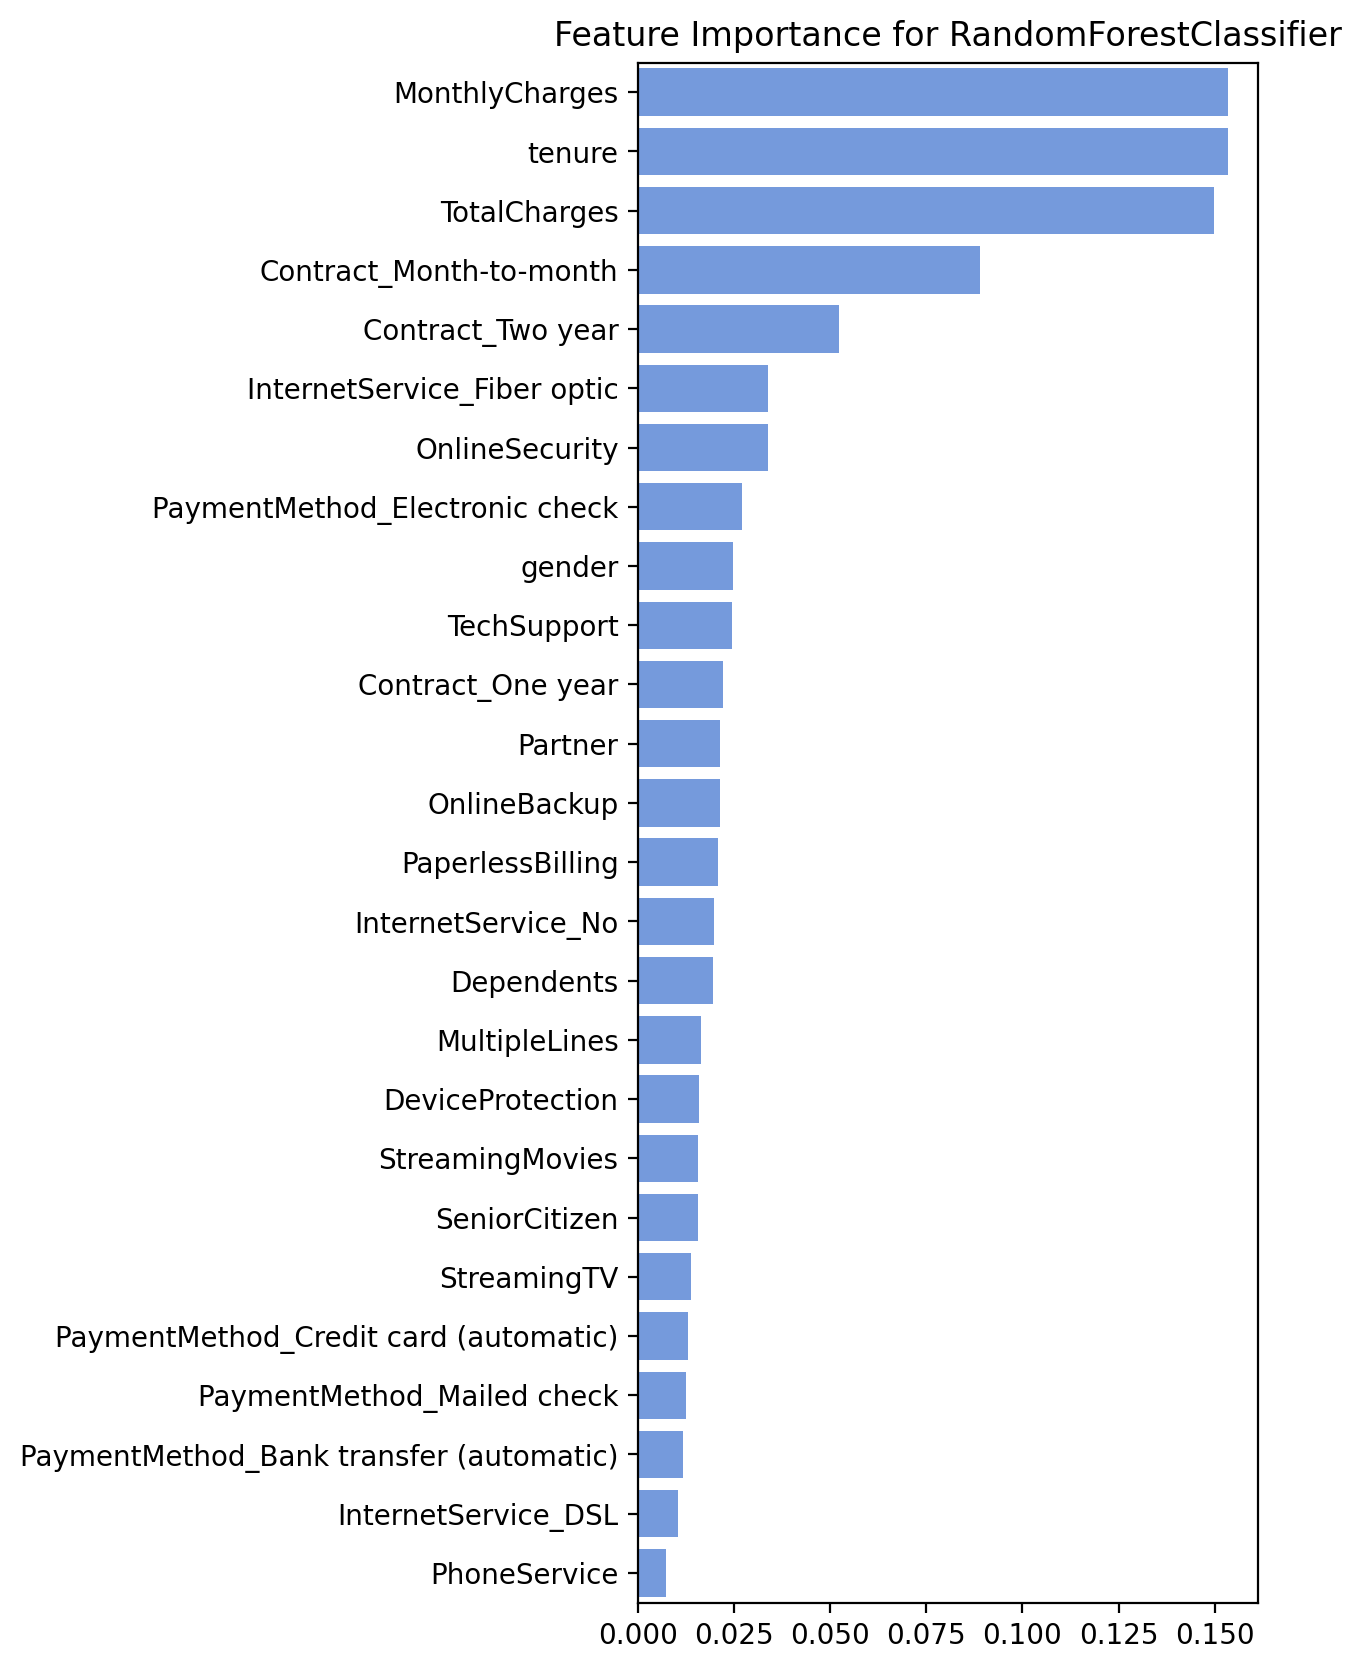

In [62]:
important_features(rf_fit)

**Boosted Trees Classifier**

**AdaBoost Classifier**

In [63]:

ada_model = AdaBoostClassifier()

param_grid = {
    'n_estimators': [10,50, 100, 200]
    ,'learning_rate':[0.05,0.1,0.2]
}

ada_fit, train_ada, test_ada, f1_ada, pred_ada, time_ada = best_params(ada_model, param_grid)

The best parameters for AdaBoostClassifier model is: {'learning_rate': 0.2, 'n_estimators': 200}
--------------------
(R2 score) in the training set is 78.86% for AdaBoostClassifier model.
(R2 score) in the testing set is 80.40% for AdaBoostClassifier model.
F1 score is 0.81 for AdaBoostClassifier model.
--------------------
Runtime of the program is: 57.54


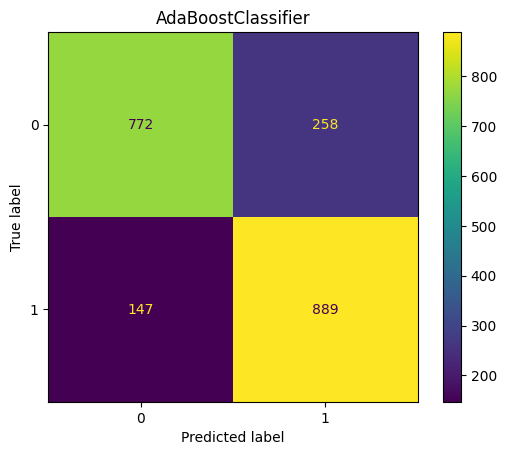

In [64]:
confusion(ada_model,pred_ada)

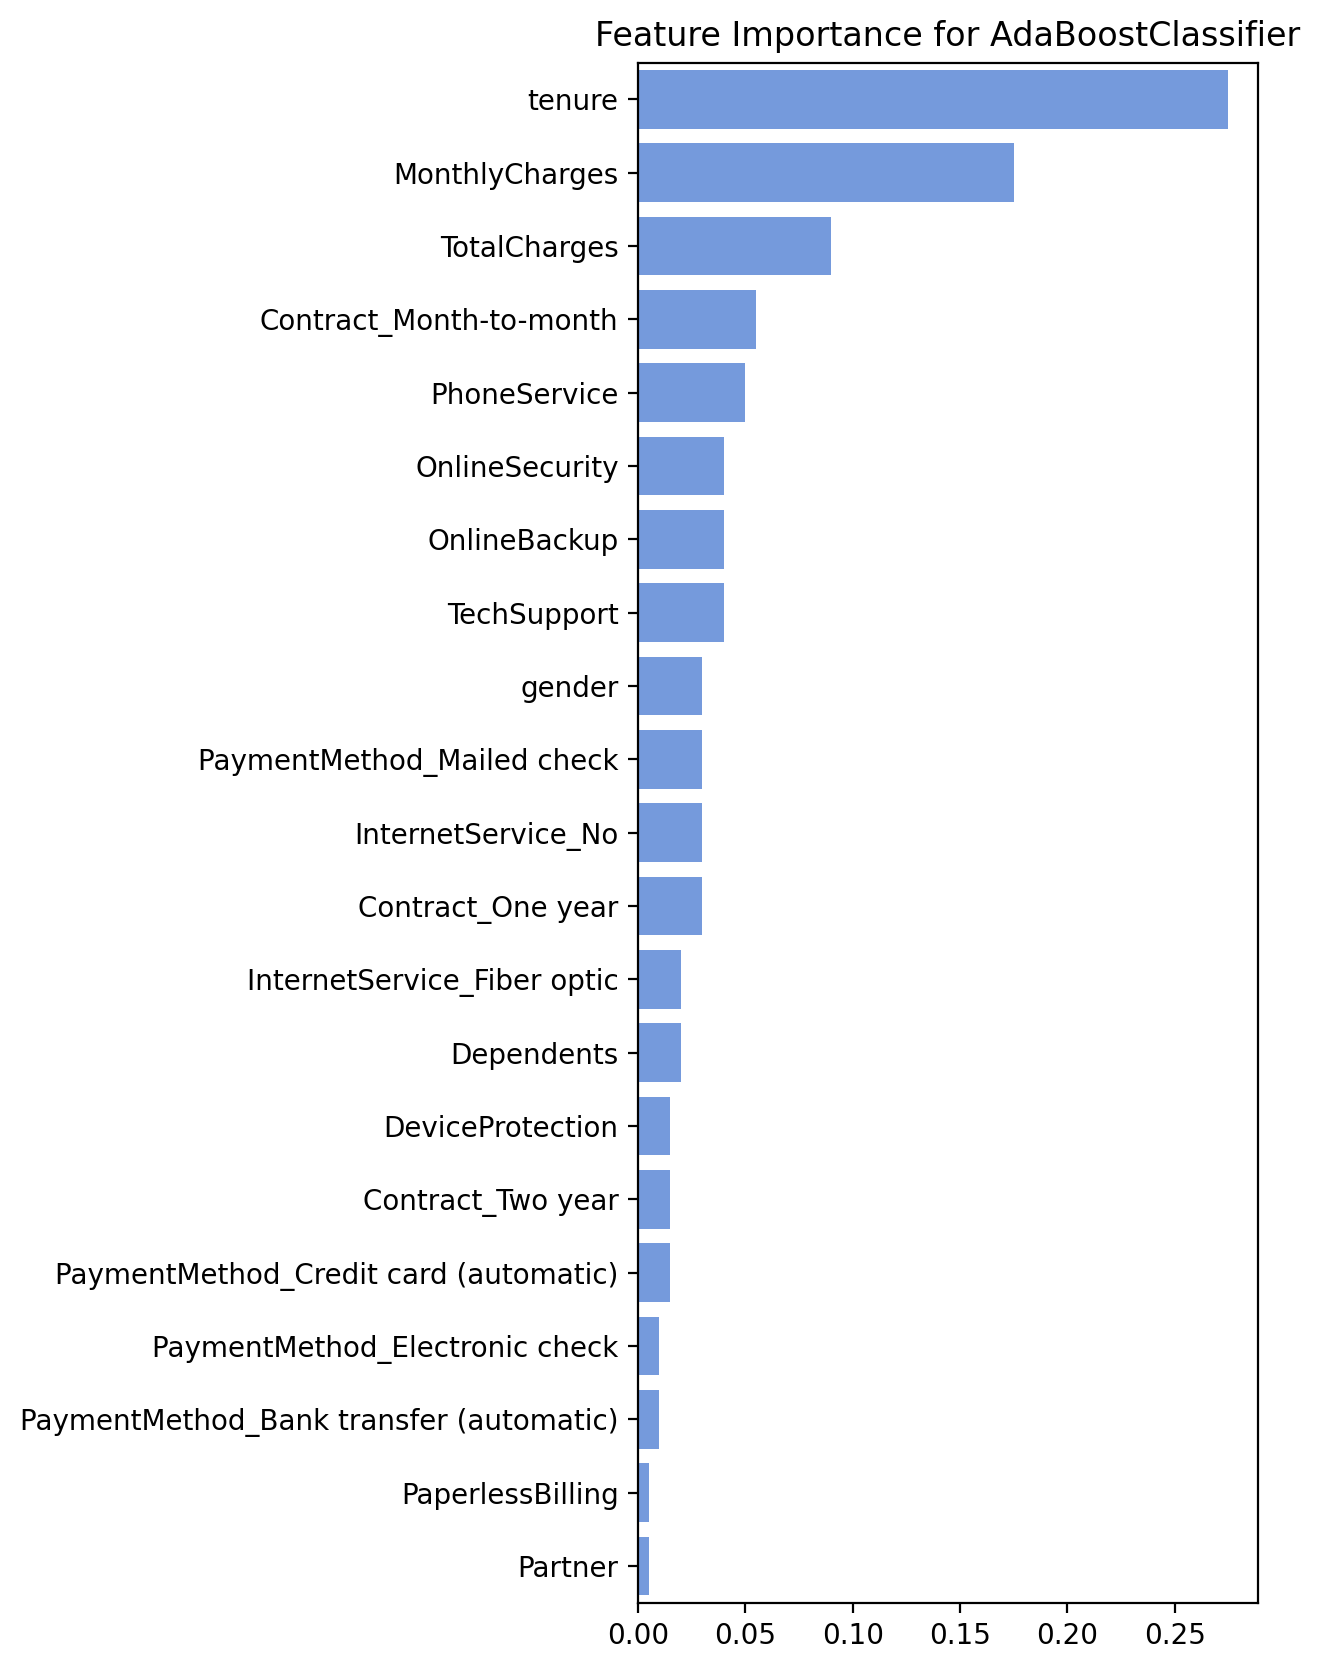

In [65]:
important_features(ada_fit)

**Gradient Boosting Classifier**

In [66]:
param_grid = {"n_estimators":[1,5,10,20,40,100]
              ,'learning_rate':[0.1,0.05,0.2]
              ,'max_depth':[3,4,5,6]}
gb_model = GradientBoostingClassifier()

gb_fit, train_gb, test_gb, f1_gb, pred_gb, time_gb = best_params(gb_model, param_grid)

The best parameters for GradientBoostingClassifier model is: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100}
--------------------
(R2 score) in the training set is 94.71% for GradientBoostingClassifier model.
(R2 score) in the testing set is 83.54% for GradientBoostingClassifier model.
F1 score is 0.84 for GradientBoostingClassifier model.
--------------------
Runtime of the program is: 201.53


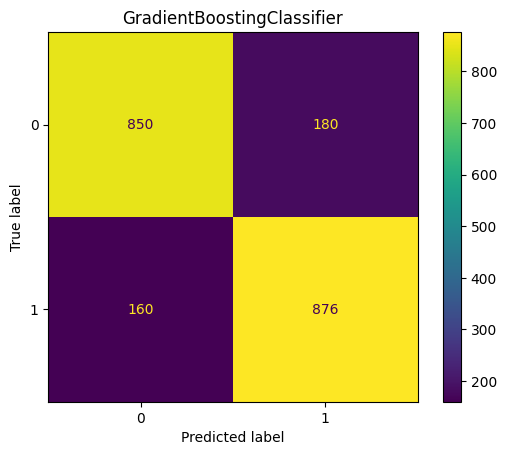

In [67]:
confusion(gb_model,pred_gb)

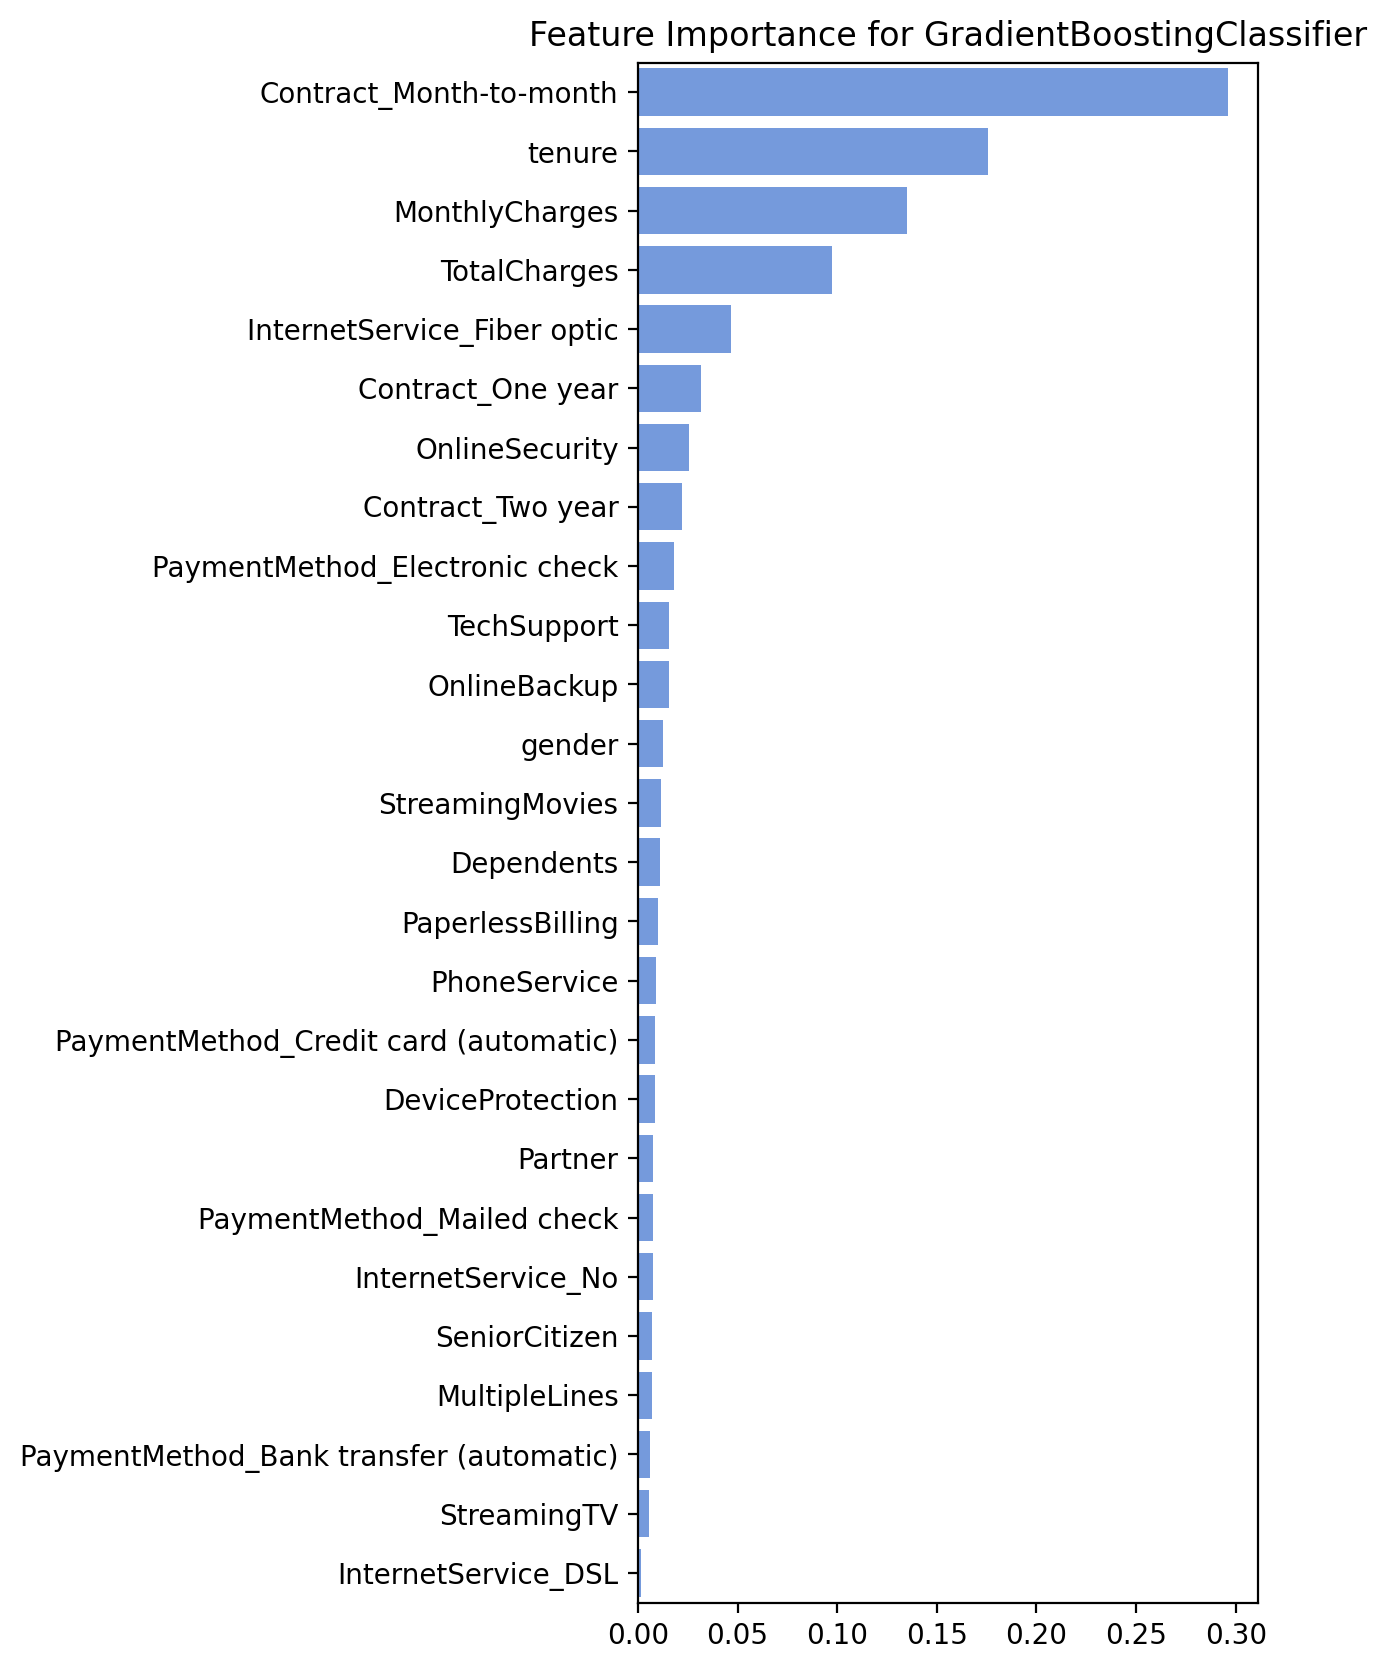

In [91]:
important_features(gb_fit)

**XGBoost**

In [ ]:
xgb_model = XGBClassifier()

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)


xgb_fit, train_xgb, test_xgb, f1_xgb, pred_xgb, time_xgb = best_params(xgb_model, param_grid
                                                                       , y_train1 = y_train_encoded, y_test1 = y_test_encoded)

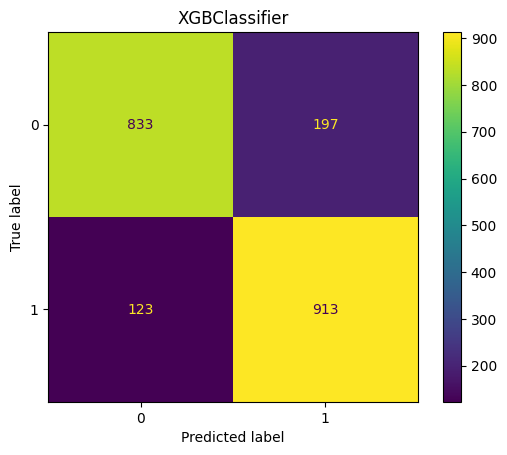

In [90]:
confusion(xgb_fit,pred_xgb, y_test1 = y_test_encoded)

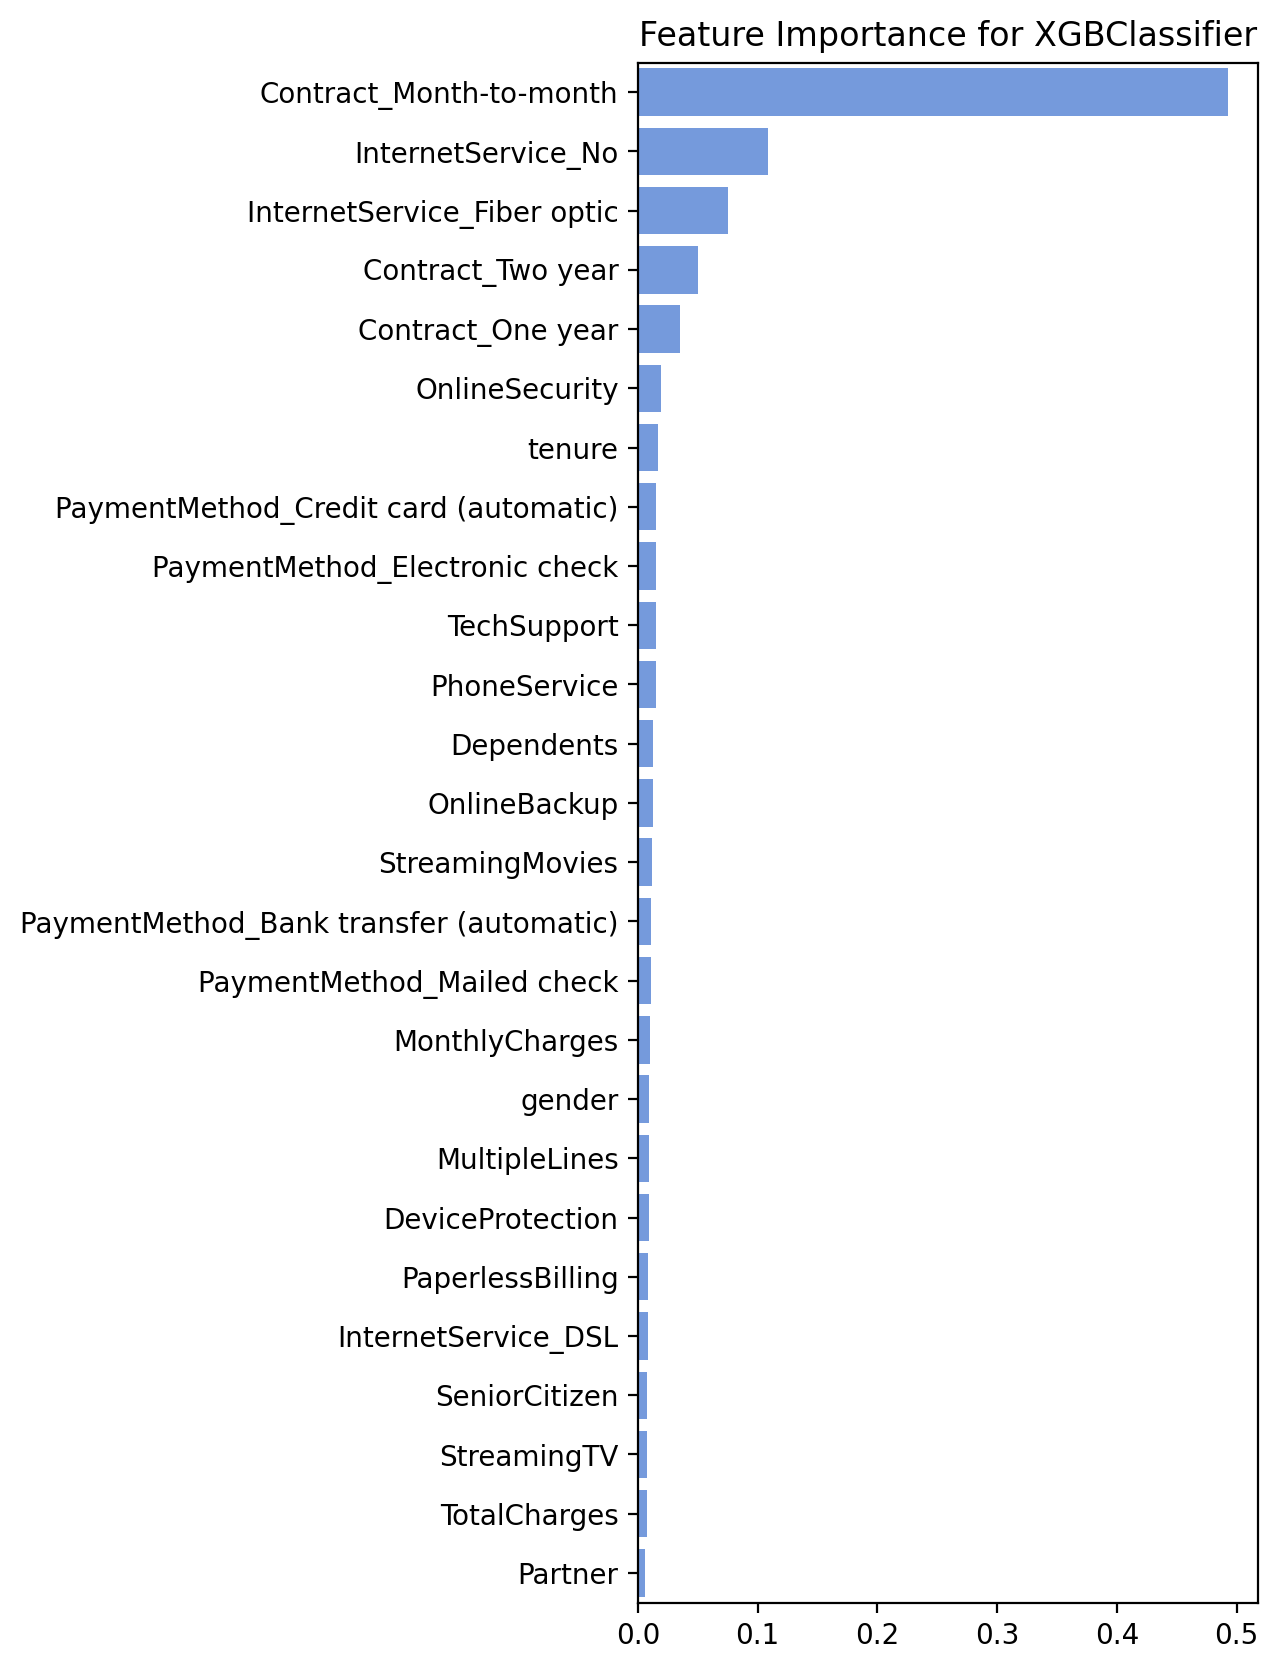

In [89]:
important_features(xgb_fit)
plt.savefig('best_model_impfeat.png', bbox_inches='tight')

**Classification MLPs**

In [ ]:
mlp_model = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=256)

In [92]:
mlp_model.fit(X_train, y_train)
pred_mlp = mlp_model.predict(X_test)
train_mlp = mlp_model.score(X_train, y_train)
test_mlp = mlp_model.score(X_test, y_test)
f1_mlp = f1_score(y_test, pred_mlp).round(2)

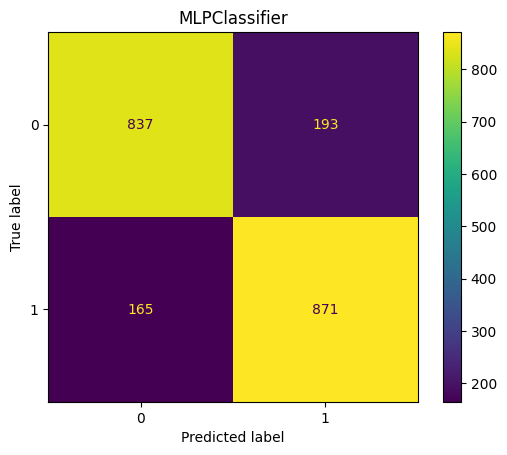

In [93]:
confusion(mlp_model,pred_mlp)

Initialize ANN

In [ ]:
classifier = Sequential()

# Add the input layer and the first hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))
classifier.add(Dropout(0.1))

# Second hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dropout(0.1))

# output layer
classifier.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

#compile
classifier.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
ann_model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (26,), activation = "relu"),
    keras.layers.Dense(15, activation = "relu"),
    keras.layers.Dense(1, activation = "sigmoid")])

In [ ]:
ann_model.compile(optimizer = "adam",
             loss = "binary_crossentropy",
             metrics = ["accuracy"])

In [ ]:
X_train.shape

In [ ]:
ann_model.fit(X_train,y_train,epochs = 100)

In [ ]:
#model_history = classifier.fit(X_train, y_train, validation_split=0.20, batch_size = 10, epochs = 100)

In [94]:
pred_ann_proba = ann_model.predict(X_test)

pred_ann = []

for elements in pred_ann_proba:
    if elements >= 0.5:
        pred_ann.append(1)
    else:
        pred_ann.append(0)

train_ann = ann_model.evaluate(X_train, y_train)[1]
test_ann = ann_model.evaluate(X_test, y_test)[1]
f1_ann = f1_score(y_test, pred_ann).round(2)

65/65 [==============================] - 0s 2ms/step - loss: 0.3801 - accuracy: 0.8287


**Result**

In [96]:
result = {
    "Train Score":[train_logreg, train_svc, train_dt, train_rf, train_ada, train_gb, train_xgb, train_mlp, train_ann],
    "Test Score":[test_logreg, test_svc, test_dt, test_rf, test_ada, test_gb, test_xgb, test_mlp, test_ann],
    "F1 Score":[f1_logreg,f1_svc, f1_dt,f1_rf, test_ada, f1_gb,f1_xgb,f1_mlp, f1_ann]
}

index = np.array(["Logistic Reg", "Decision Tree", "Support Vector Machine",
                  "Random Forest", "AdaBoost", "Gradient Boosting", "XGBoosting",
                  "Multilayer Perceptron", "ANN"])

res_df = pd.DataFrame(data=result,index=index)
res_df

Train Score  Test Score  F1 Score
Logistic Reg               0.815496    0.823814  0.830000
Decision Tree              0.831598    0.825750  0.830000
Support Vector Machine     0.857506    0.799129  0.810000
Random Forest              0.998426    0.851404  0.850000
AdaBoost                   0.788620    0.803969  0.803969
Gradient Boosting          0.947094    0.835431  0.840000
XGBoosting                 0.914770    0.845111  0.850000
Multilayer Perceptron      0.822760    0.826718  0.830000
ANN                        0.847458    0.828654  0.840000

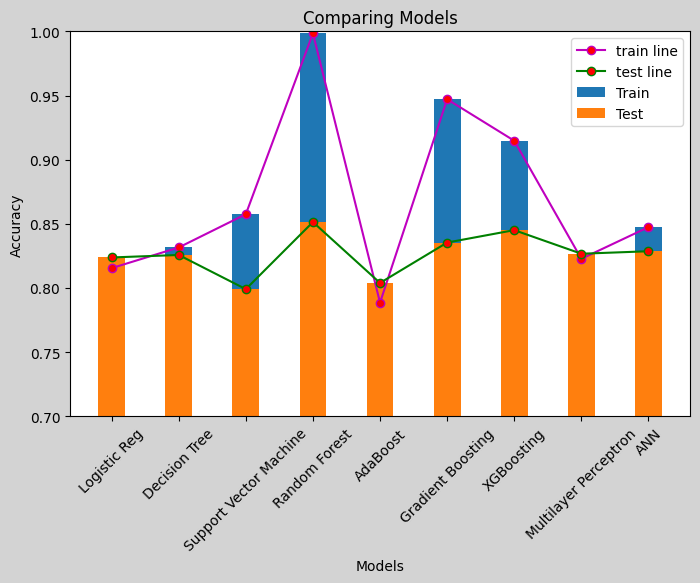

In [95]:
fig , ax = plt.subplots(figsize=(8,5),facecolor="lightgray")
x = np.arange(9)
ax.plot(x,res_df["Train Score"],marker="o",mfc="red",color="m",label="train line")
ax.bar(x,res_df["Train Score"],label="Train",width=0.4)
ax.plot(x,res_df["Test Score"],marker="o",mfc="red",color="green",label="test line")
ax.bar(x,res_df["Test Score"],label="Test",width=0.4)
ax.set(xticks=x,ylim=[0.7,1],xlabel="Models",ylabel="Accuracy",
      title="Comparing Models")
ax.set_xticklabels(index,rotation=45)
ax.legend()
plt.savefig('modComparison.png', bbox_inches='tight')

The best models that are not overfiting are Gradient Boosting and XGB

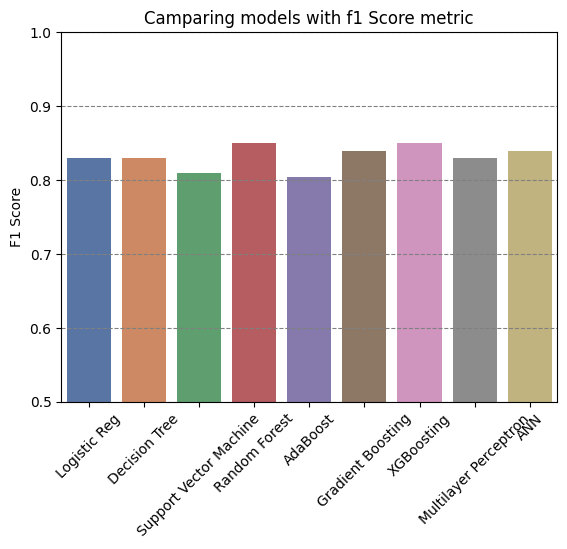

In [87]:
fig , ax = plt.subplots()
sns.barplot(data=res_df,x=x,y="F1 Score",ax=ax,palette="deep")
ax.set_xticklabels(index,rotation=45)
ax.set_ylim([0.5,1])
ax.grid(axis="y",ls="--",color="gray")
ax.set_title("Camparing models with f1 Score metric");
plt.savefig('f1modComparison.png', bbox_inches='tight')